## EDA: Matplotlib and Seaborn ##

In this jupyter notebook we will perform Exploratory Data Analysis (EDA) on categorical and numerical columns from the the Products Table located in file product_tr.xlsx. The analysis will be both, univariate and bivariate. The objective is to start answering the initial questions we have formulated as well as find new patterns and existing relationships between variables. For this aim, we will use two different python libraries for data visualization: matplotlib and seaborn.

In [1]:
#First we need to import the necessary libraries

import seaborn as sns  #library for data viz
import matplotlib.pyplot as plt #library for data viz
import pandas as pd #library for data manipulation and transfomation
pd.set_option("display.max_columns", None) #we configure pandas to display all columns from dataframe when needed.
import numpy as np #to perform calculations with numpy numbers. Just in case we need it.

In [2]:
#Now we need to load the whole dataset. We will start with the products table.

df_prod_tr = pd.read_excel("../1_Data/Data_Transformed/products_tr.xlsx")
display(df_prod_tr.head())

Ingredient  Number_Of_Ingredients Combination_Drug  \
0                 BUDESONIDE                      1               No   
1                 BUDESONIDE                      1               No   
2  MINOCYCLINE HYDROCHLORIDE                      1               No   
3               AZELAIC ACID                      1               No   
4     BETAMETHASONE VALERATE                      1               No   

     Dosage_Form    Route              Trade_Name        Applicant  Appl_Type  \
0  AEROSOL, FOAM   RECTAL              BUDESONIDE   PADAGIS ISRAEL    Generic   
1  AEROSOL, FOAM   RECTAL                  UCERIS            SALIX  Innovator   
2  AEROSOL, FOAM  TOPICAL                  AMZEEQ          JOURNEY  Innovator   
3  AEROSOL, FOAM  TOPICAL            AZELAIC ACID  TEVA PHARMS USA    Generic   
4  AEROSOL, FOAM  TOPICAL  BETAMETHASONE VALERATE          ALEMBIC    Generic   

   Appl_No  Product_No Approval_Date Reference_Listed_Drug Reference_Standard  \
0   215328           1    2023-04-12                    No                Yes   
1   205613           1    2014-10-07                   Yes                 No   
2   212379           1    2019-10-18                   Yes                Yes   
3   210928           1    2020-10-07                    No                 No   
4   215832           1    2024-08-22                    No                 No   

  Therapeutically_Equivalent          Type                 Applicant_Full_Name  
0                        Yes  Prescription  PADAGIS ISRAEL PHARMACEUTICALS LTD  
1                        Yes  Prescription           SALIX PHARMACEUTICALS INC  
2                  Not Rated  Prescription                JOURNEY MEDICAL CORP  
3                  Not Rated  Discontinued        TEVA PHARMACEUTICALS USA INC  
4                        Yes  Prescription         ALEMBIC PHARMACEUTICALS LTD

In [3]:
df_prod_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Ingredient                  46050 non-null  object        
 1   Number_Of_Ingredients       46050 non-null  int64         
 2   Combination_Drug            46050 non-null  object        
 3   Dosage_Form                 46049 non-null  object        
 4   Route                       46015 non-null  object        
 5   Trade_Name                  46050 non-null  object        
 6   Applicant                   46050 non-null  object        
 7   Appl_Type                   46050 non-null  object        
 8   Appl_No                     46050 non-null  int64         
 9   Product_No                  46050 non-null  int64         
 10  Approval_Date               46050 non-null  datetime64[ns]
 11  Reference_Listed_Drug       46050 non-null  object    

### Univariate analysis of categorical columns ###

In [4]:
#First of all, we will create a dataframe just with categorical columns.

df_prod_tr_cat = df_prod_tr.select_dtypes(include='object') #the function select_dtypes returns a filtered df.
df_prod_tr_cat.head()

Ingredient Combination_Drug    Dosage_Form    Route  \
0                 BUDESONIDE               No  AEROSOL, FOAM   RECTAL   
1                 BUDESONIDE               No  AEROSOL, FOAM   RECTAL   
2  MINOCYCLINE HYDROCHLORIDE               No  AEROSOL, FOAM  TOPICAL   
3               AZELAIC ACID               No  AEROSOL, FOAM  TOPICAL   
4     BETAMETHASONE VALERATE               No  AEROSOL, FOAM  TOPICAL   

               Trade_Name        Applicant  Appl_Type Reference_Listed_Drug  \
0              BUDESONIDE   PADAGIS ISRAEL    Generic                    No   
1                  UCERIS            SALIX  Innovator                   Yes   
2                  AMZEEQ          JOURNEY  Innovator                   Yes   
3            AZELAIC ACID  TEVA PHARMS USA    Generic                    No   
4  BETAMETHASONE VALERATE          ALEMBIC    Generic                    No   

  Reference_Standard Therapeutically_Equivalent          Type  \
0                Yes                        Yes  Prescription   
1                 No                        Yes  Prescription   
2                Yes                  Not Rated  Prescription   
3                 No                  Not Rated  Discontinued   
4                 No                        Yes  Prescription   

                  Applicant_Full_Name  
0  PADAGIS ISRAEL PHARMACEUTICALS LTD  
1           SALIX PHARMACEUTICALS INC  
2                JOURNEY MEDICAL CORP  
3        TEVA PHARMACEUTICALS USA INC  
4         ALEMBIC PHARMACEUTICALS LTD

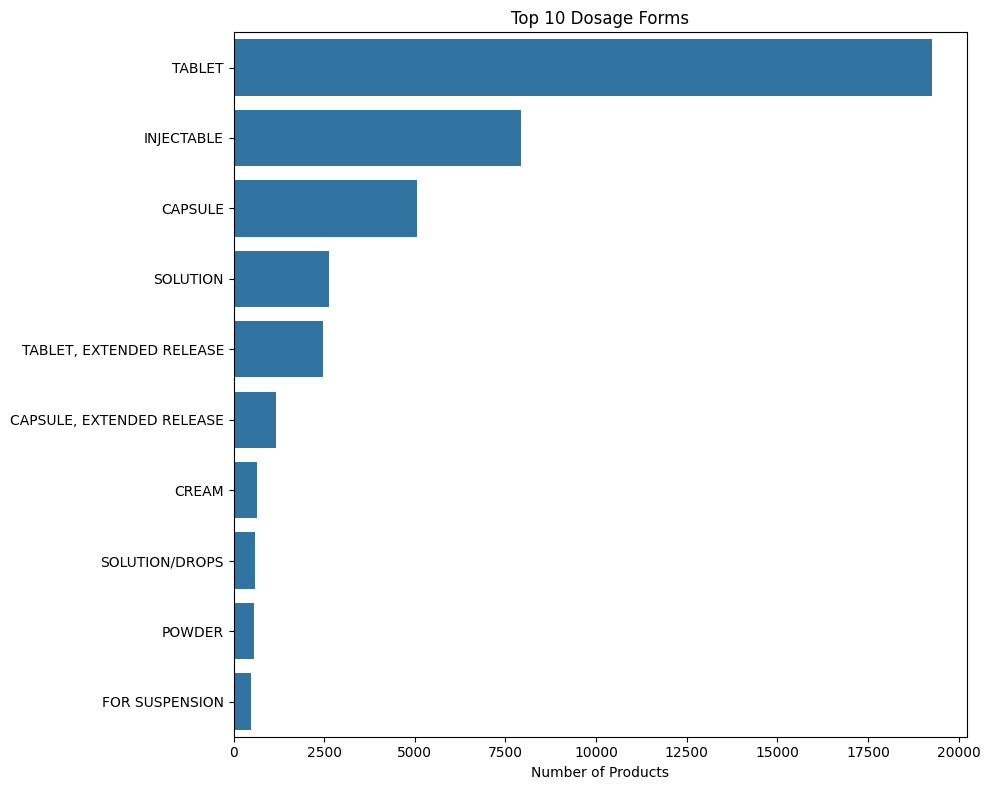

In [5]:
#Univariate analysis of Dosage_Form

# First we need to order the x axis and extract a top 10 to limit the number of categories to be displayed in the countplot.

order = df_prod_tr_cat['Dosage_Form'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Dosage_Form', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Dosage Forms')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.tight_layout()
plt.show()

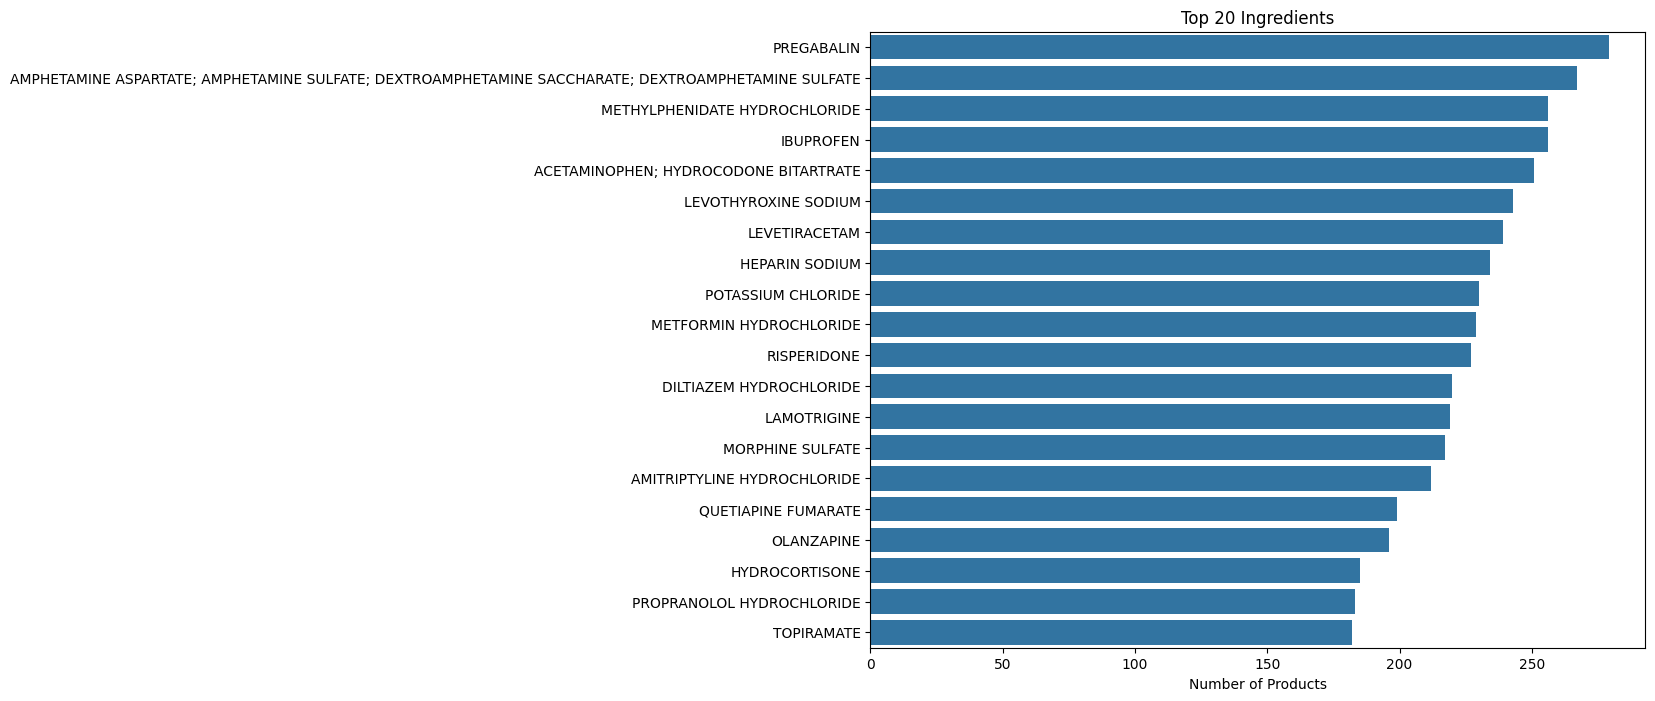

In [6]:
#Univariate analysis of Ingredient

order = df_prod_tr_cat['Ingredient'].value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Ingredient', order=order) #here we apply the order we have previously defined.
plt.title('Top 20 Ingredients')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

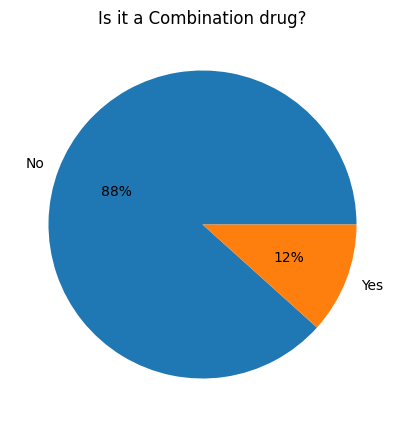

In [7]:
#Univariate analysis for Combination_Drug

data = df_prod_tr_cat['Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Is it a Combination drug?')
plt.show()

In [8]:
#Univariate analysis for Route
df_prod_tr_cat['Route'].value_counts()

Route
ORAL                                            31435
INJECTION                                        7162
TOPICAL                                          1797
INTRAVENOUS                                      1685
OPHTHALMIC                                        786
                                                ...  
INTRA-ARTICULAR                                     1
ENDOCERVICAL                                        1
INTRA-ARTICULAR, INTRAMUSCULAR, INTRAVITREAL        1
INTRACAMERAL                                        1
PERFUSION, BILIARY                                  1
Name: count, Length: 78, dtype: int64

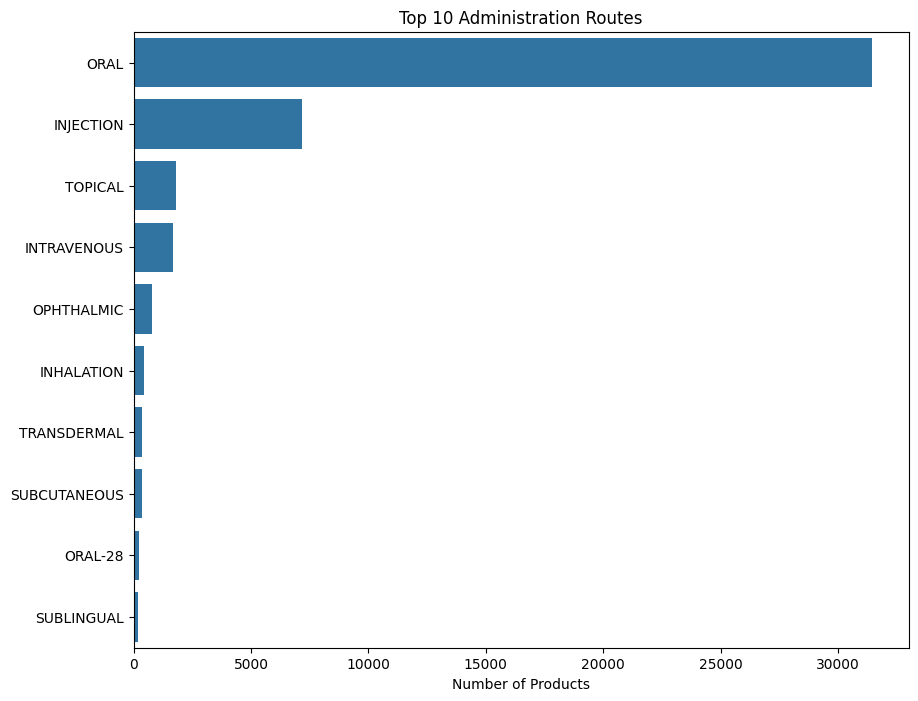

In [9]:
order = df_prod_tr_cat['Route'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Route', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Administration Routes')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

In [10]:
#Lets check how many products were tagged with the administration route "ORAL-28".

df_prod_tr_cat['Route'][df_prod_tr_cat['Route']=='ORAL-28'].value_counts()

Route
ORAL-28    232
Name: count, dtype: int64

In [11]:
#We decided to include these products inside the ORAL category. Therefore, we need to perform further transformations:

df_prod_tr['Route'] = df_prod_tr['Route'].str.replace('ORAL-28','ORAL')
df_prod_tr_cat['Route'] = df_prod_tr_cat['Route'].str.replace('ORAL-28','ORAL')

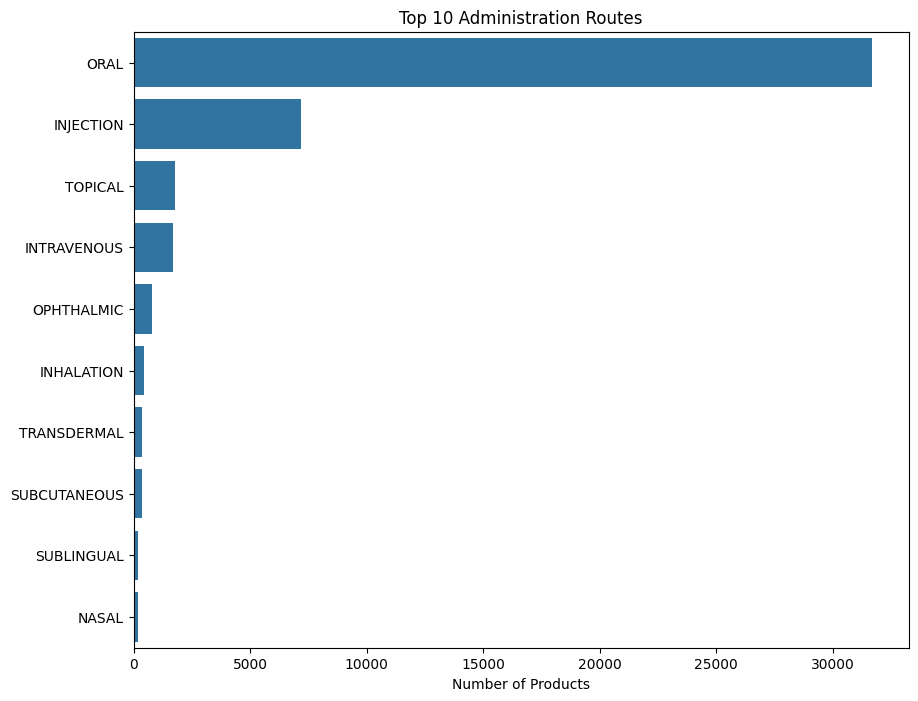

In [12]:
#Let's generate the countplot again...

order = df_prod_tr_cat['Route'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Route', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Administration Routes')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

In [13]:
#Univariate analysis for Trade_Name.

df_prod_tr_cat['Trade_Name'].value_counts()

Trade_Name
PREGABALIN                                                                267
DEXTROAMP SACCHARATE, AMP ASPARTATE, DEXTROAMP SULFATE AND AMP SULFATE    244
HYDROCODONE BITARTRATE AND ACETAMINOPHEN                                  221
METFORMIN HYDROCHLORIDE                                                   216
LEVETIRACETAM                                                             200
                                                                         ... 
CHLOROPTIC                                                                  1
COMBIGAN                                                                    1
COSOPT                                                                      1
COSOPT PF                                                                   1
NYSTAFORM                                                                   1
Name: count, Length: 7400, dtype: int64

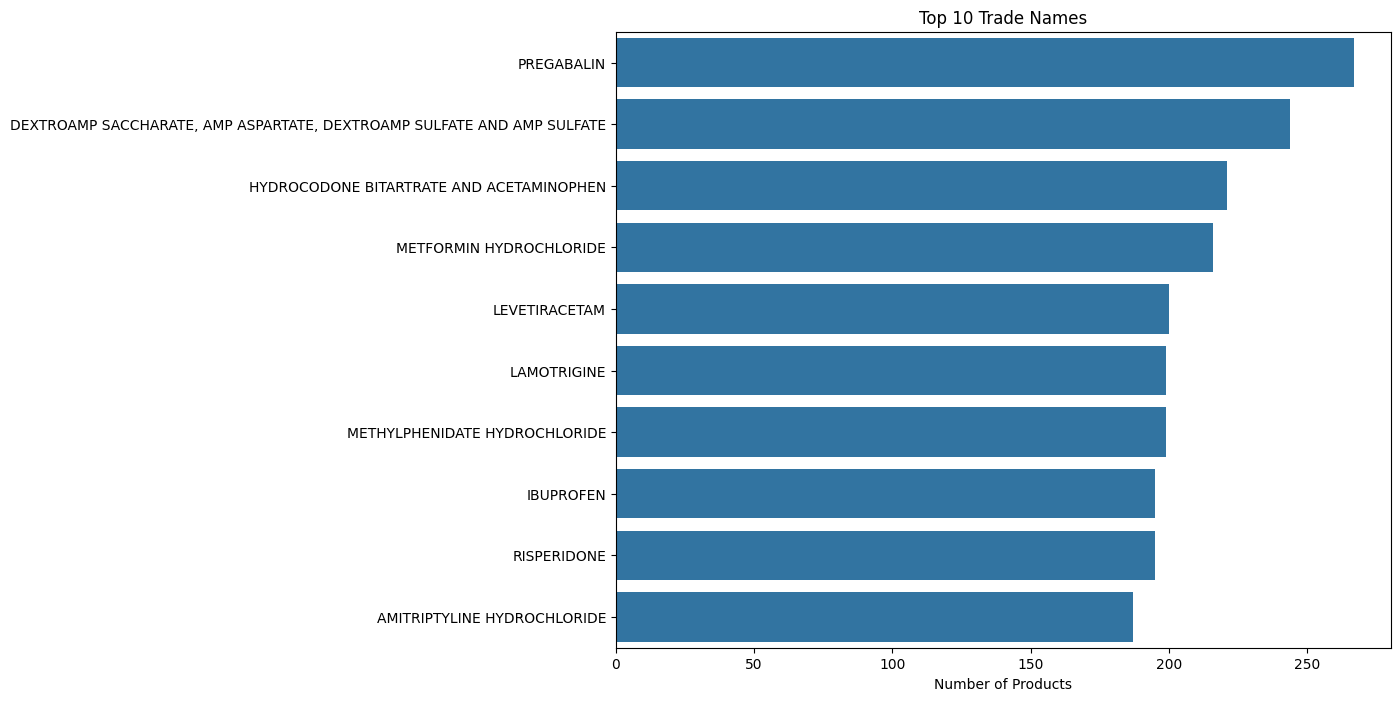

In [14]:
order = df_prod_tr_cat['Trade_Name'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Trade_Name', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Trade Names')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

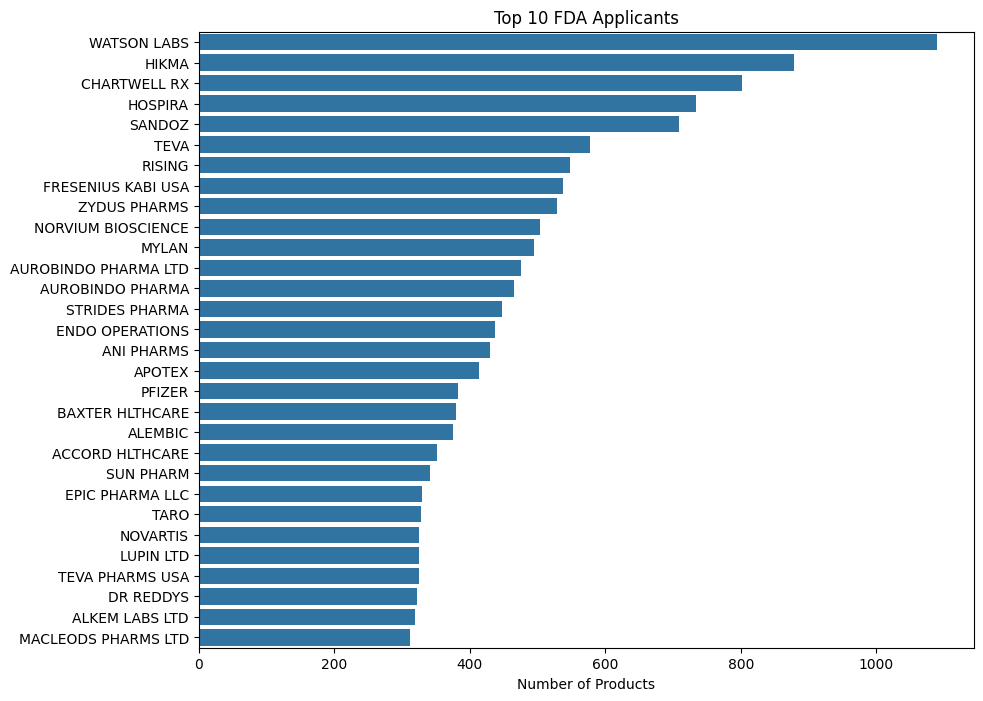

In [15]:
#Univariate analysis for Applicant.

order = df_prod_tr_cat['Applicant'].value_counts().nlargest(30).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Applicant', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 FDA Applicants')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

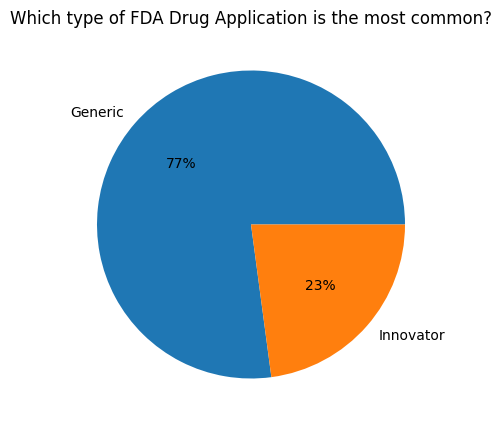

In [16]:
#Univariate analysis for Appl_Type

data = df_prod_tr_cat['Appl_Type'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Appl_Type'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which type of FDA Drug Application is the most common?')
plt.show()

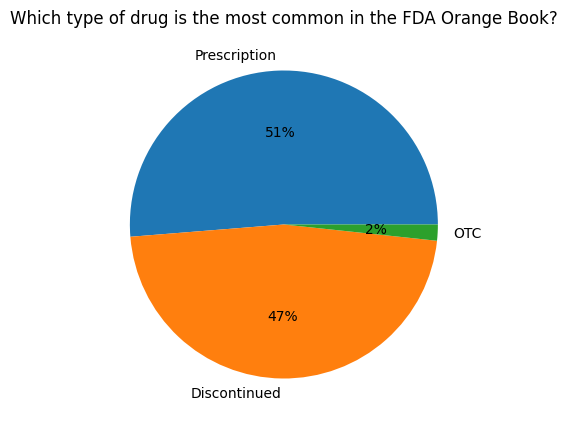

In [17]:
#Univariate analysis for Type

data = df_prod_tr_cat['Type'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Type'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Which type of drug is the most common in the FDA Orange Book?')
plt.show()

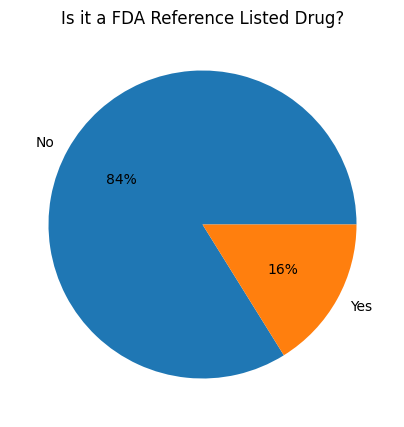

In [18]:
#Univariate analysis for Reference_Listed_Drug

data = df_prod_tr_cat['Reference_Listed_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Reference_Listed_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Is it a FDA Reference Listed Drug?')
plt.show()

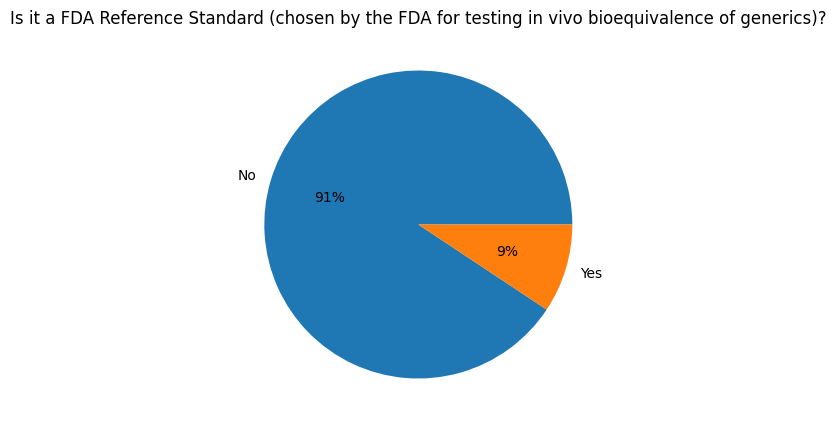

In [19]:
#Univariate analysis for Reference_Standard

data = df_prod_tr_cat['Reference_Standard'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Reference_Standard'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Is it a FDA Reference Standard (chosen by the FDA for testing in vivo bioequivalence of generics)?')
plt.show()

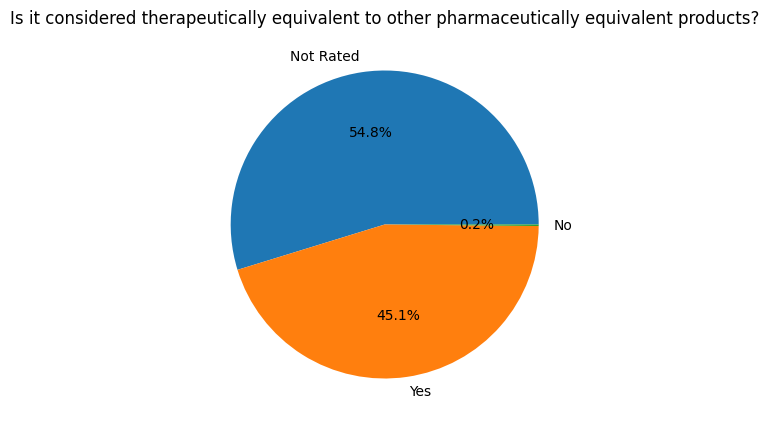

In [20]:
#Univariate analysis for Therapeutically_Equivalent

data = df_prod_tr_cat['Therapeutically_Equivalent'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Therapeutically_Equivalent'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.1f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Is it considered therapeutically equivalent to other pharmaceutically equivalent products?')
plt.show()

In [21]:
#I am curious about which FDA-approved drugs were not considered to be therapeutically equivalent to other pharmaceutically equivalent products. Which are those generics that the FDA does not recognize to be therapeutically equivalent to their pharmaceutically equivalent drug?
display(df_prod_tr_cat.loc[(df_prod_tr_cat['Therapeutically_Equivalent']=="No") & (df_prod_tr_cat['Appl_Type']=="Generic"),'Trade_Name'].unique())

array(['EPIFOAM', 'PROCTOFOAM HC', 'TACROLIMUS', 'DIFLORASONE DIACETATE',
       'TERCONAZOLE', 'VITAMIN K1', 'METHYLPHENIDATE HYDROCHLORIDE',
       'PALIPERIDONE', 'ACETAZOLAMIDE', 'ALBUTEROL SULFATE', 'AMABELZ',
       'ANDROID 25', 'ATORVASTATIN CALCIUM', 'BACLOFEN', 'CARBAMAZEPINE',
       'DEXAMETHASONE', 'E.E.S. 400', 'ERYTHROMYCIN ETHYLSUCCINATE',
       'FEBUXOSTAT', 'FENOFIBRATE', 'METHYLTESTOSTERONE', 'PREDNISOLONE',
       'PREDNISONE', 'PROPYLTHIOURACIL', 'RISEDRONATE SODIUM',
       'SILDENAFIL CITRATE', 'TADALAFIL', 'BLISOVI FE 1.5/30'],
      dtype=object)

Lets start answering some of the questions I made myself...

1. Mode/median/mean number of API in the composition of FDA-approved drugs. Is it different between innovators and generics? Is it different between Rx and OTC?

In [22]:
print('Mode/median/mean number of API in the composition of FDA-approved drugs:')
print(f'Mean  = {round(df_prod_tr.loc[df_prod_tr['Type']!="Discontinued",'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[df_prod_tr['Type']!="Discontinued",'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[df_prod_tr['Type']!="Discontinued",'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved Innovators:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Innovator"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Innovator"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Innovator"),'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved Generics:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Generic"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Generic"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Generic"),'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved Rx drugs:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="Prescription"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="Prescription"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="Prescription"),'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved OTC drugs:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="OTC"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="OTC"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="OTC"),'Number_Of_Ingredients'].mode()[0],0)}')

Mode/median/mean number of API in the composition of FDA-approved drugs:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved Innovators:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved Generics:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved Rx drugs:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved OTC drugs:
Mean  = 1.0
Median  = 1.0
Mode  = 1


2. What percentage represent combination drugs (multiple APIs in their composition) with respect to the total FDA-Approved products? Is it different between innovators and generics? Is it different between Rx and OTC?

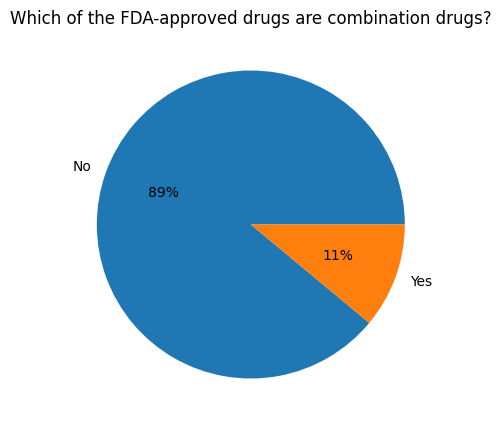

In [23]:
#Univariate analysis for Combination_Drug

data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"),'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved drugs are combination drugs?')
plt.show()

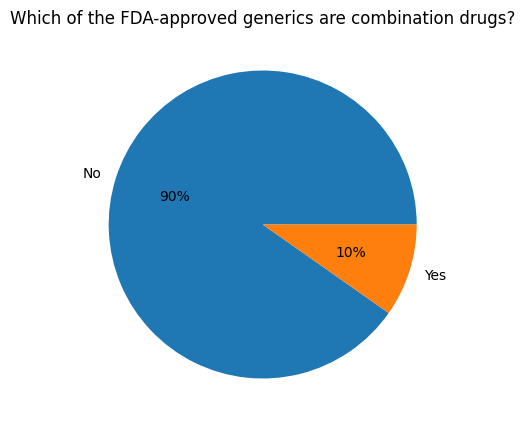

In [24]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued") ,"Combination_Drug"].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved generics are combination drugs?')
plt.show()

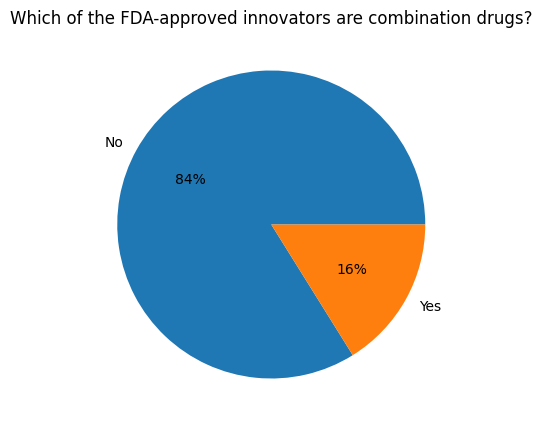

In [25]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=='Innovator') & (df_prod_tr_cat['Type']!="Discontinued") ,'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved innovators are combination drugs?')
plt.show()

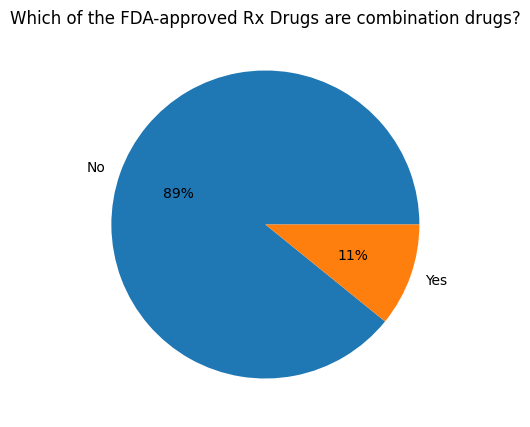

In [26]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=='Prescription') & (df_prod_tr_cat['Type']!="Discontinued") ,'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved Rx Drugs are combination drugs?')
plt.show()

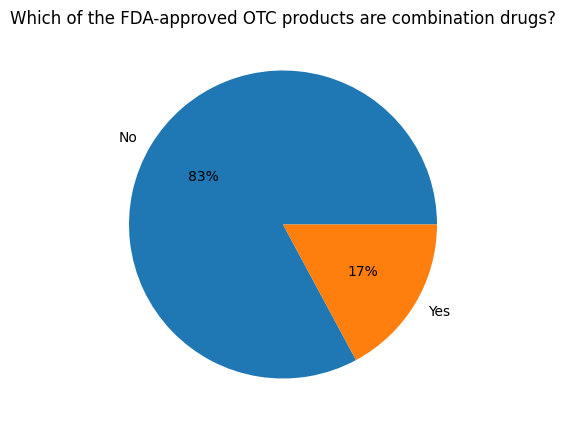

In [27]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=='OTC') & (df_prod_tr_cat['Type']!="Discontinued") ,'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved OTC products are combination drugs?')
plt.show()

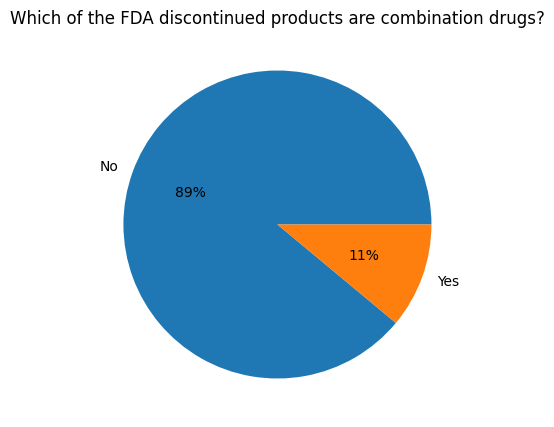

In [28]:
data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']!="Discontinued",'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA discontinued products are combination drugs?')
plt.show()

3. Which are the most popular APIs in FDA-approved products’ composition? Is it different between innovators and generics? Is it different between Rx and OTC?

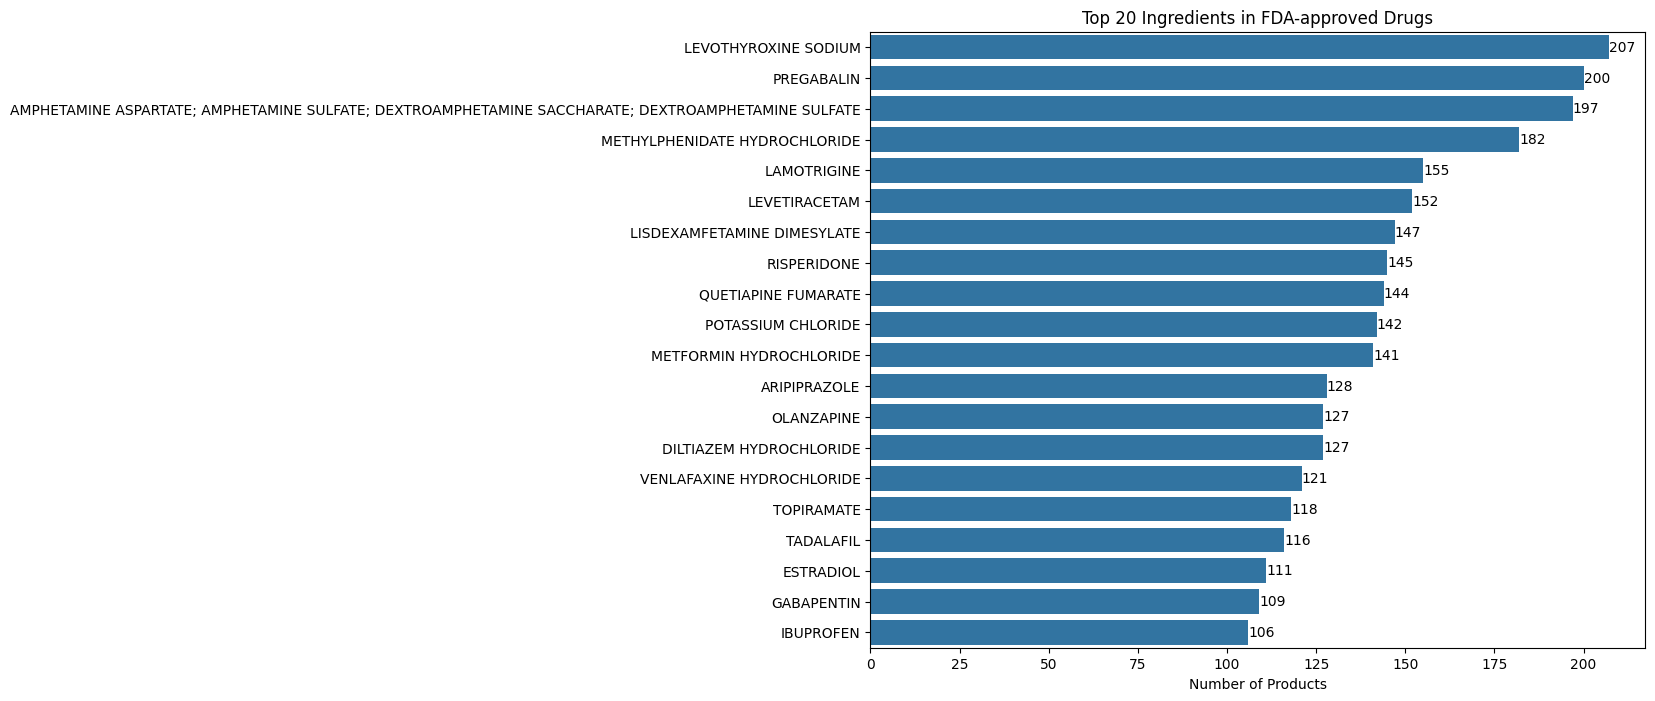

In [29]:
#Univariate analysis of Ingredient

filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"), 'Ingredient']

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.


fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=pd.DataFrame(filtered_data),y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

df = filtered_data.value_counts().nlargest(20).reset_index()

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in df['count']))

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

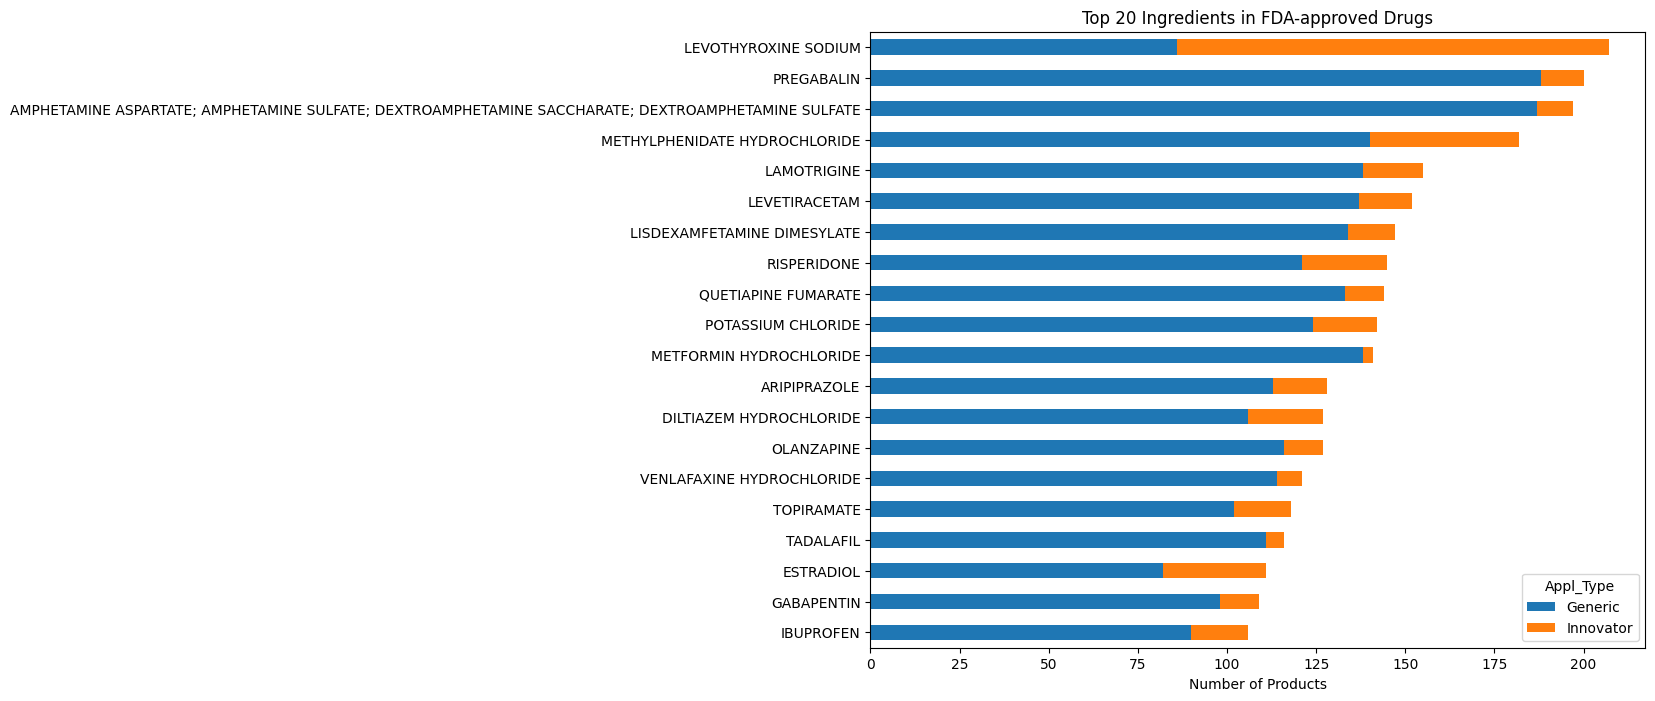

In [30]:
# Filter data
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type'] != "Discontinued"]

# Compute counts of 'Innovator' and 'Generic' per ingredient
stacked_data = pd.crosstab(filtered_data['Ingredient'], filtered_data['Appl_Type']) #it counts innovators and generics per ingredient.
# display (stacked_data.head())
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).nlargest(20).sort_values(ascending=True).index]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
stacked_data.plot(kind='barh', stacked=True, ax=ax)

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.legend(title='Appl_Type')
plt.show()

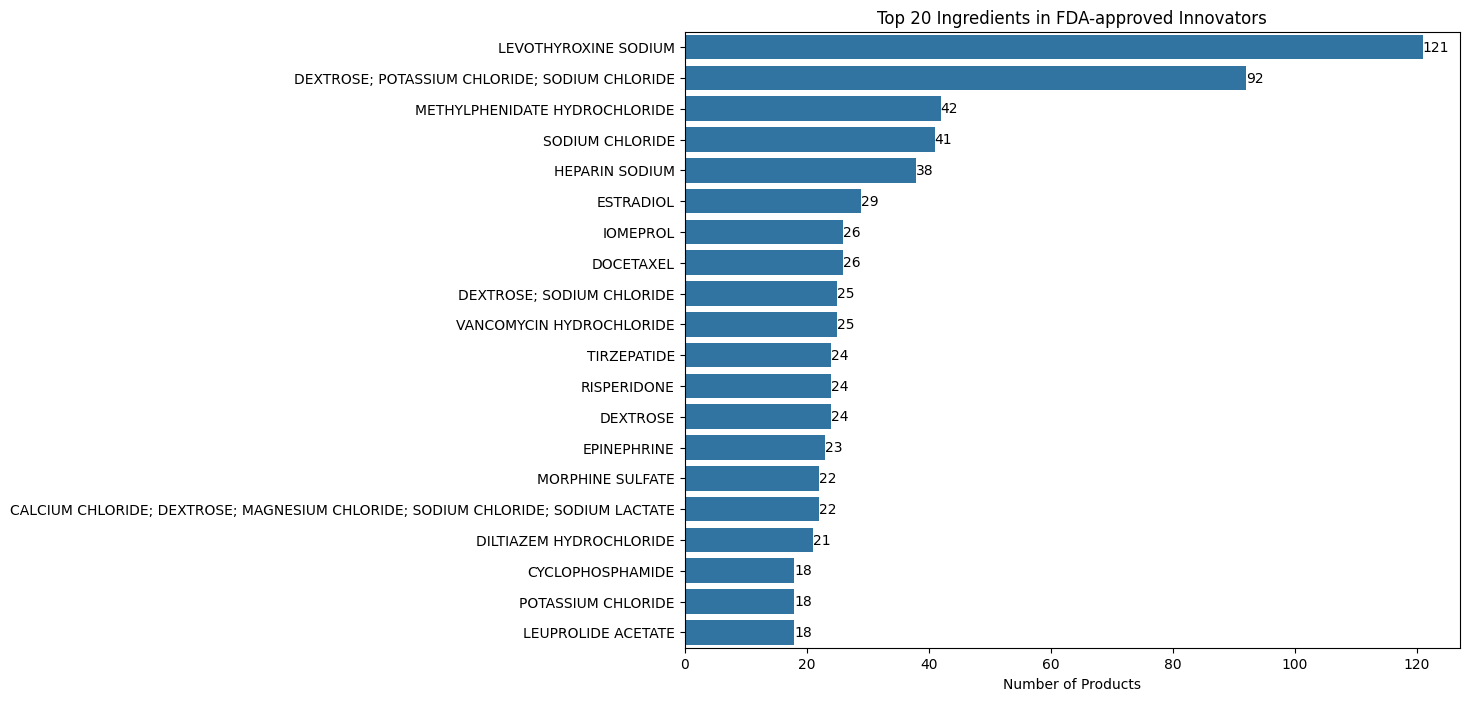

In [31]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"),'Ingredient'] #we filter dataframe to obtain just the ingredients of FDA-approved innovators.
order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=pd.DataFrame(filtered_data),y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

df = filtered_data.value_counts().nlargest(20).reset_index()

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in df['count']))

plt.title('Top 20 Ingredients in FDA-approved Innovators')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

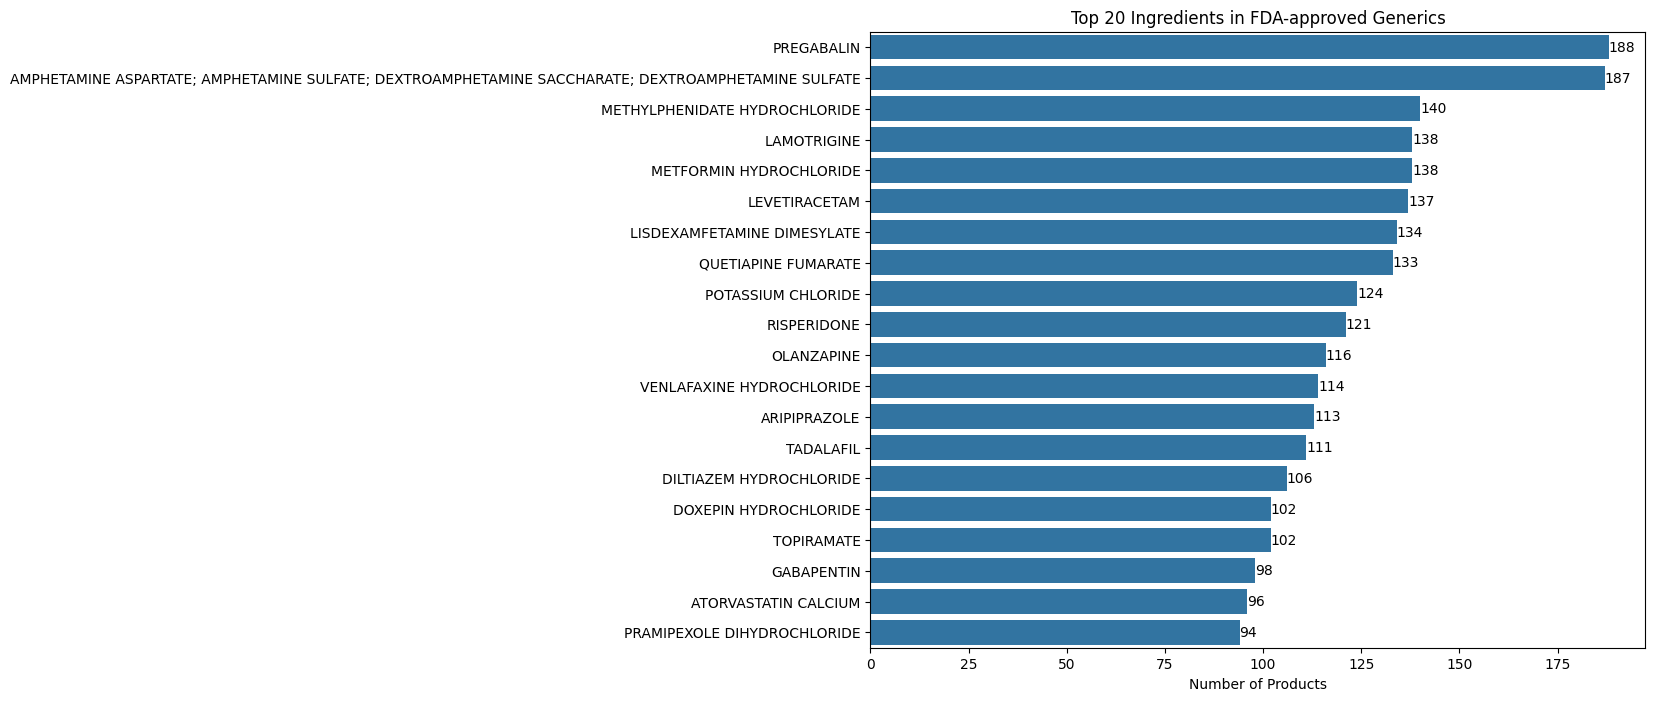

In [32]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"),'Ingredient'] #we filter dataframe to obtain just the ingredients of FDA-approved generics.
order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=pd.DataFrame(filtered_data),y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

df = filtered_data.value_counts().nlargest(20).reset_index()

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in df['count']))
  
plt.title('Top 20 Ingredients in FDA-approved Generics')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Ingredient  count
0                               LEVOTHYROXINE SODIUM    207
1                                         PREGABALIN    200
2  AMPHETAMINE ASPARTATE; AMPHETAMINE SULFATE; DE...    197
3                      METHYLPHENIDATE HYDROCHLORIDE    182
4                                        LAMOTRIGINE    155

Ingredient  count
19  DOXEPIN HYDROCHLORIDE    105
18             GABAPENTIN    109
17              ESTRADIOL    111
16              TADALAFIL    116
15             TOPIRAMATE    118

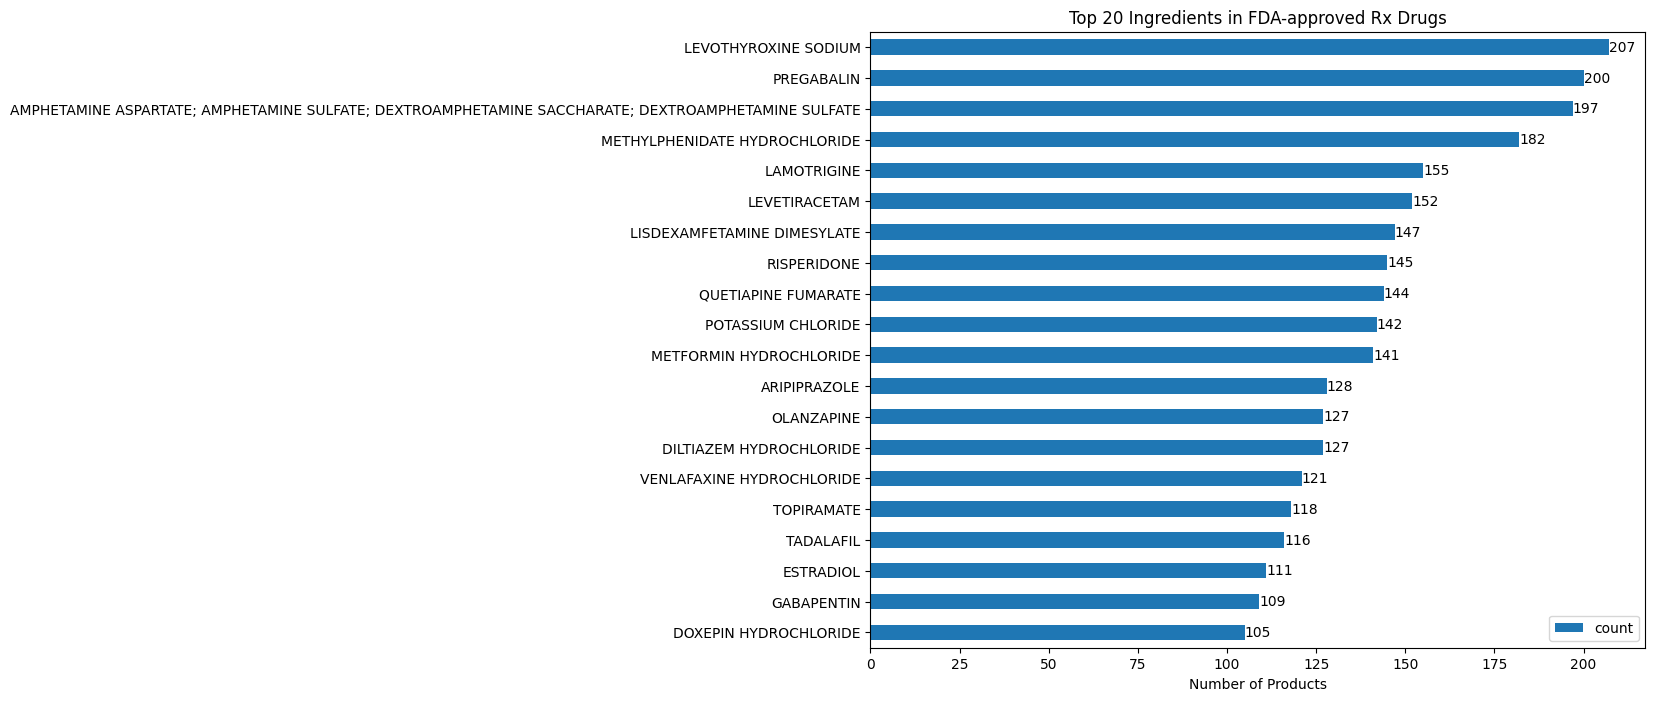

In [33]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="Prescription",'Ingredient'].value_counts().reset_index() #we filter dataframe to obtain just the ingredients of FDA-approved Rx.

display(filtered_data.head())

order = filtered_data['count'].nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
filtered_data = filtered_data.loc[order].sort_values(by='count')

display(filtered_data.head())

filtered_data.plot(kind="barh", x='Ingredient', ax=ax) #here we apply the order we have previously defined.

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in filtered_data['count']))

plt.title('Top 20 Ingredients in FDA-approved Rx Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Ingredient  count
0    CETIRIZINE HYDROCHLORIDE     93
1         NICOTINE POLACRILEX     70
2                   IBUPROFEN     62
3  FEXOFENADINE HYDROCHLORIDE     47
4                  LORATADINE     39

Ingredient  count
19  GUAIFENESIN; PSEUDOEPHEDRINE HYDROCHLORIDE     12
17                     CHLORHEXIDINE GLUCONATE     12
18                    LOPERAMIDE HYDROCHLORIDE     12
16                               ACETAMINOPHEN     13
15                              LEVONORGESTREL     13

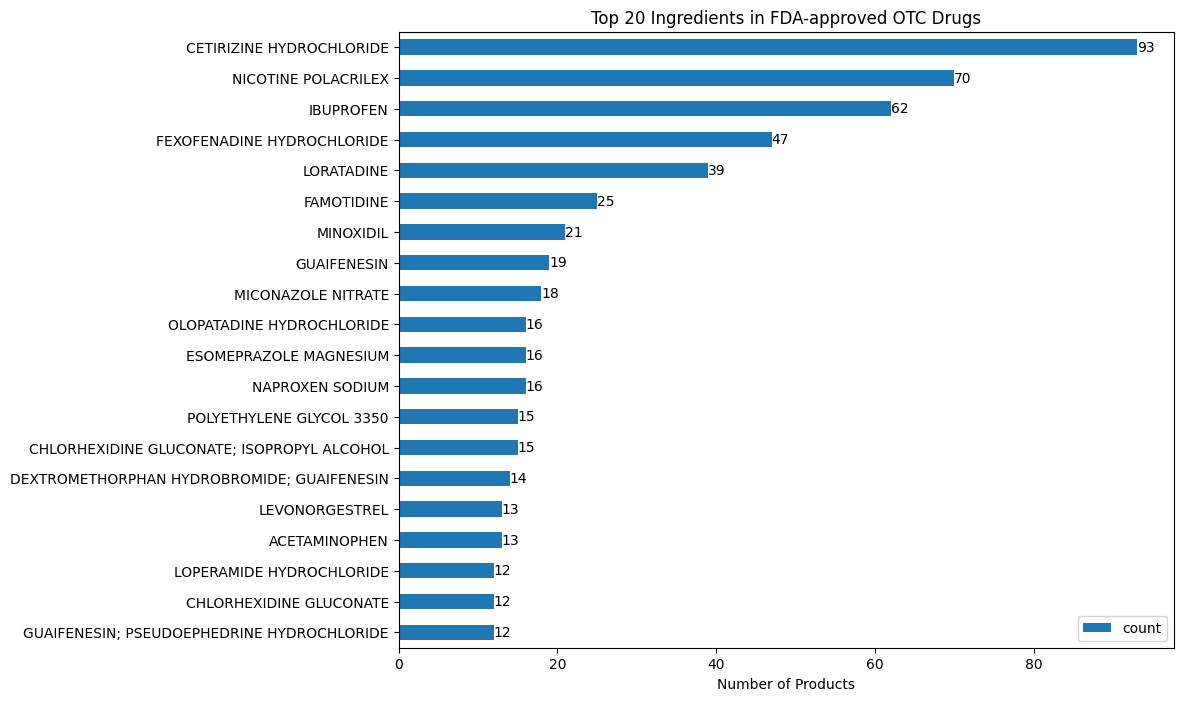

In [34]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="OTC",'Ingredient'].value_counts().reset_index() #we filter dataframe to obtain just the ingredients of FDA-approved Rx.

display(filtered_data.head())

order = filtered_data['count'].nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
filtered_data = filtered_data.loc[order].sort_values(by='count')

display(filtered_data.head())

filtered_data.plot(kind="barh", x='Ingredient', ax=ax) #here we apply the order we have previously defined.

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in filtered_data['count']))

plt.title('Top 20 Ingredients in FDA-approved OTC Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

4. Which are the most common dosage forms and administration routes in FDA-approved drugs? Is it different between innovators and generics? Is it different between Rx and OTC?

In [35]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter the dataframe to obtain just the dosage forms of FDA-approved innovators.

pd.DataFrame(filtered_data).head()

Dosage_Form
1   AEROSOL, FOAM
2   AEROSOL, FOAM
21  AEROSOL, FOAM
22  AEROSOL, FOAM
25  AEROSOL, FOAM

Dosage_Form  count  Percentage
0                          TABLET   9913        40.7
1                      INJECTABLE   3539        14.5
2                         CAPSULE   2706        11.1
3                        SOLUTION   1711         7.0
4        TABLET, EXTENDED RELEASE   1509         6.2
5       CAPSULE, EXTENDED RELEASE    705         2.9
6                          POWDER    396         1.6
7                           CREAM    327         1.3
8                  SOLUTION/DROPS    322         1.3
9                  FOR SUSPENSION    243         1.0
10  TABLET, ORALLY DISINTEGRATING    240         1.0
11                            GEL    222         0.9
12        TABLET, DELAYED RELEASE    219         0.9
13                     SUSPENSION    209         0.9
14                       OINTMENT    201         0.8
15   CAPSULE, DELAYED REL PELLETS    177         0.7
16         FILM, EXTENDED RELEASE    153         0.6
17               TABLET, CHEWABLE    129         0.5
18                   FOR SOLUTION    108         0.4
19                          SYRUP     96         0.4

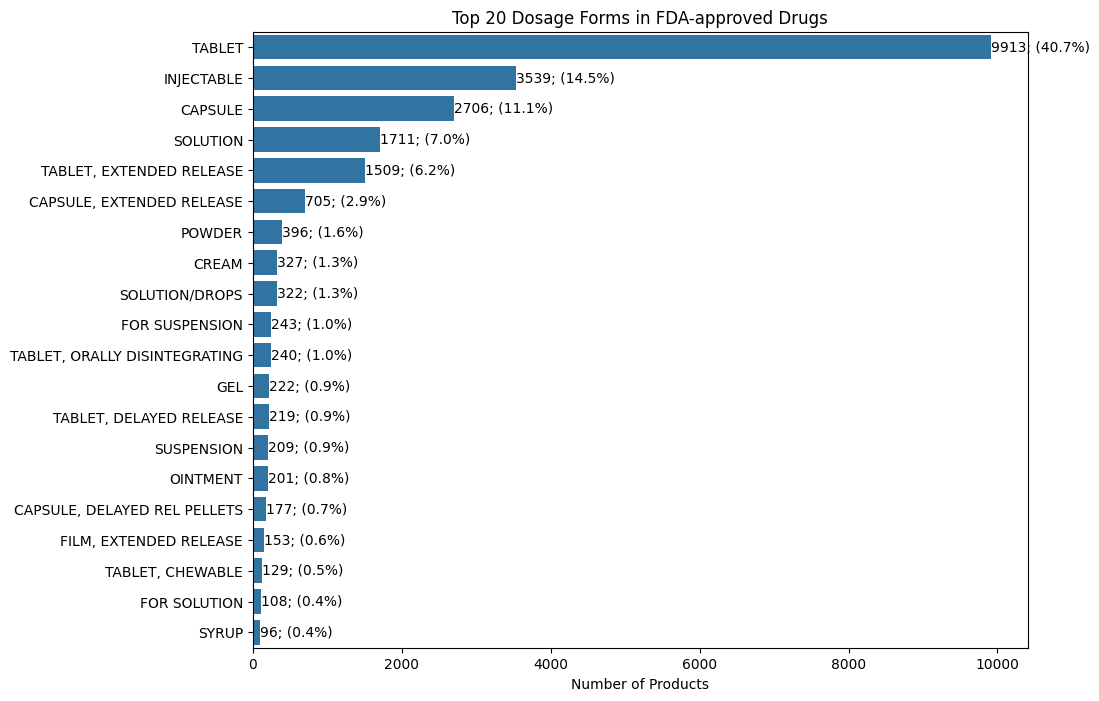

In [36]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']!="Discontinued",'Dosage_Form'] #we filter the dataframe to obtain just the dosage forms of FDA-approved drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Dosage Forms in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Dosage_Form  count  Percentage
0                         TABLET   1309        26.6
1                     INJECTABLE    821        16.7
2                       SOLUTION    718        14.6
3                        CAPSULE    448         9.1
4       TABLET, EXTENDED RELEASE    210         4.3
5                         POWDER    186         3.8
6      CAPSULE, EXTENDED RELEASE    144         2.9
7                          CREAM     77         1.6
8                 SOLUTION/DROPS     73         1.5
9                     SUSPENSION     72         1.5
10                           GEL     68         1.4
11                FOR SUSPENSION     53         1.1
12        FILM, EXTENDED RELEASE     50         1.0
13  SUSPENSION, EXTENDED RELEASE     42         0.9
14              AEROSOL, METERED     33         0.7
15                  FOR SOLUTION     29         0.6
16                        SYSTEM     28         0.6
17                SPRAY, METERED     28         0.6
18              SUSPENSION/DROPS     28         0.6
19       TABLET, DELAYED RELEASE     28         0.6

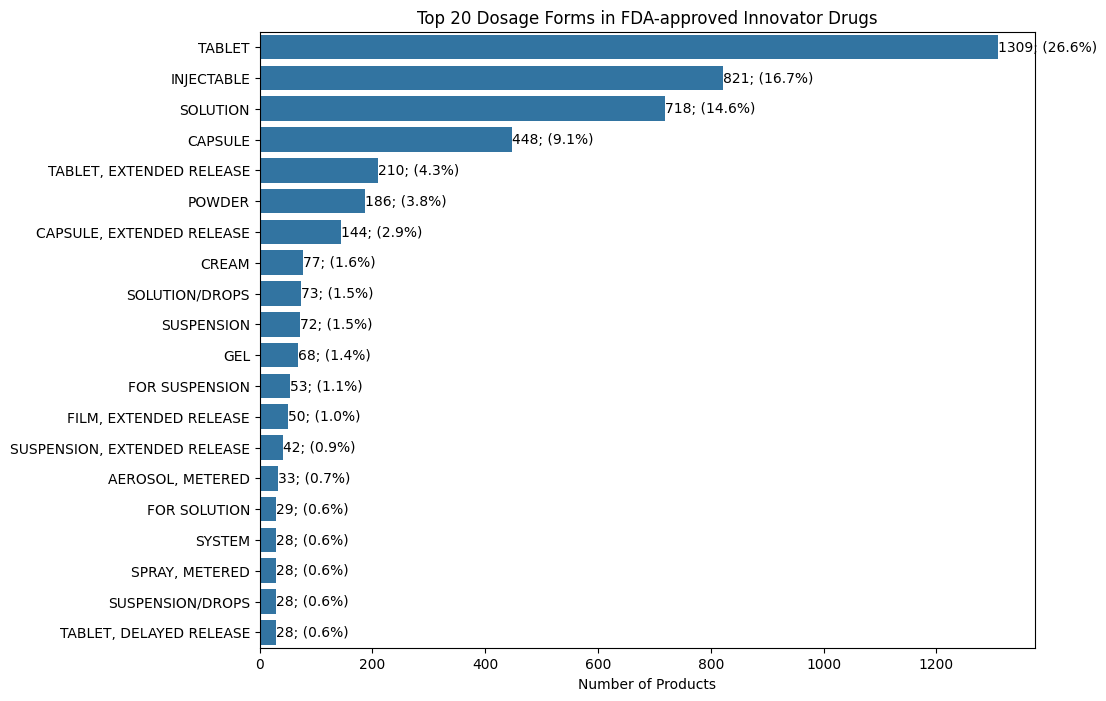

In [37]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved innovators.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved Innovator Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Dosage_Form  count  Percentage
0                          TABLET   8604        44.2
1                      INJECTABLE   2718        14.0
2                         CAPSULE   2258        11.6
3        TABLET, EXTENDED RELEASE   1299         6.7
4                        SOLUTION    993         5.1
5       CAPSULE, EXTENDED RELEASE    561         2.9
6                           CREAM    250         1.3
7                  SOLUTION/DROPS    249         1.3
8   TABLET, ORALLY DISINTEGRATING    215         1.1
9                          POWDER    210         1.1
10        TABLET, DELAYED RELEASE    191         1.0
11                 FOR SUSPENSION    190         1.0
12                       OINTMENT    176         0.9
13   CAPSULE, DELAYED REL PELLETS    164         0.8
14                            GEL    154         0.8
15                     SUSPENSION    137         0.7
16               TABLET, CHEWABLE    105         0.5
17         FILM, EXTENDED RELEASE    103         0.5
18                          SYRUP     92         0.5
19                   FOR SOLUTION     79         0.4

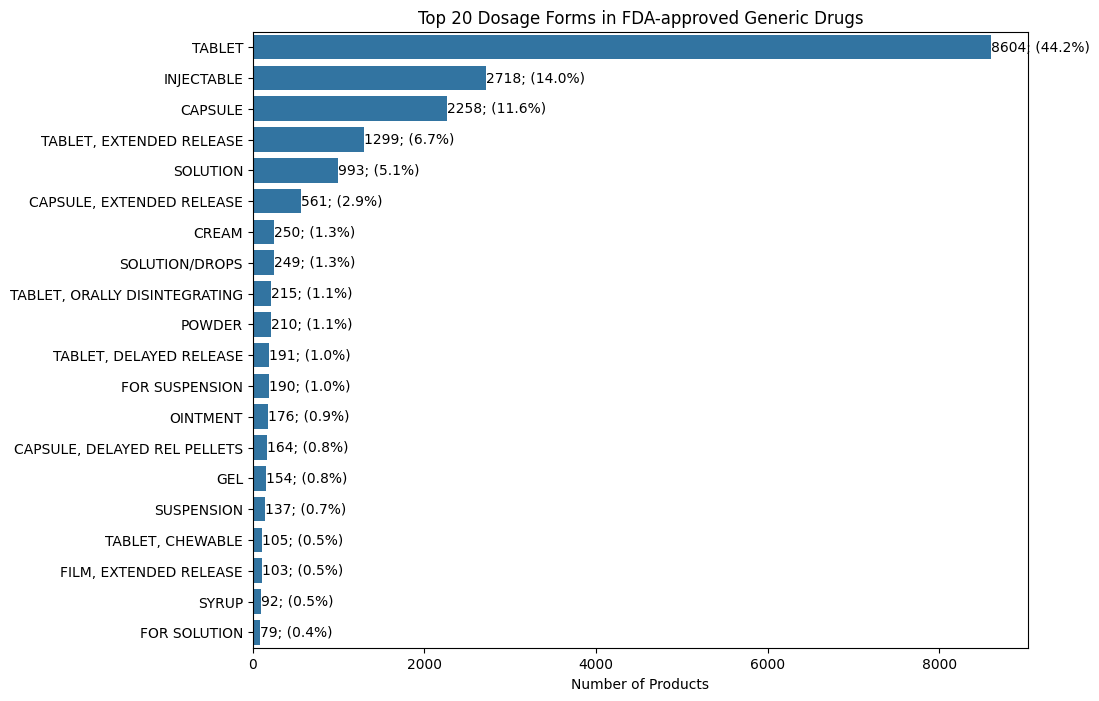

In [38]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved generics.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved Generic Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Dosage_Form  count  Percentage
0                          TABLET   9667        40.9
1                      INJECTABLE   3539        15.0
2                         CAPSULE   2661        11.3
3                        SOLUTION   1661         7.0
4        TABLET, EXTENDED RELEASE   1428         6.0
5       CAPSULE, EXTENDED RELEASE    705         3.0
6                          POWDER    396         1.7
7                           CREAM    299         1.3
8                  SOLUTION/DROPS    288         1.2
9                  FOR SUSPENSION    241         1.0
10  TABLET, ORALLY DISINTEGRATING    227         1.0
11                            GEL    211         0.9
12        TABLET, DELAYED RELEASE    207         0.9
13                       OINTMENT    199         0.8
14                     SUSPENSION    187         0.8
15   CAPSULE, DELAYED REL PELLETS    172         0.7
16         FILM, EXTENDED RELEASE    143         0.6
17               TABLET, CHEWABLE    109         0.5
18                   FOR SOLUTION     93         0.4
19                          SYRUP     88         0.4

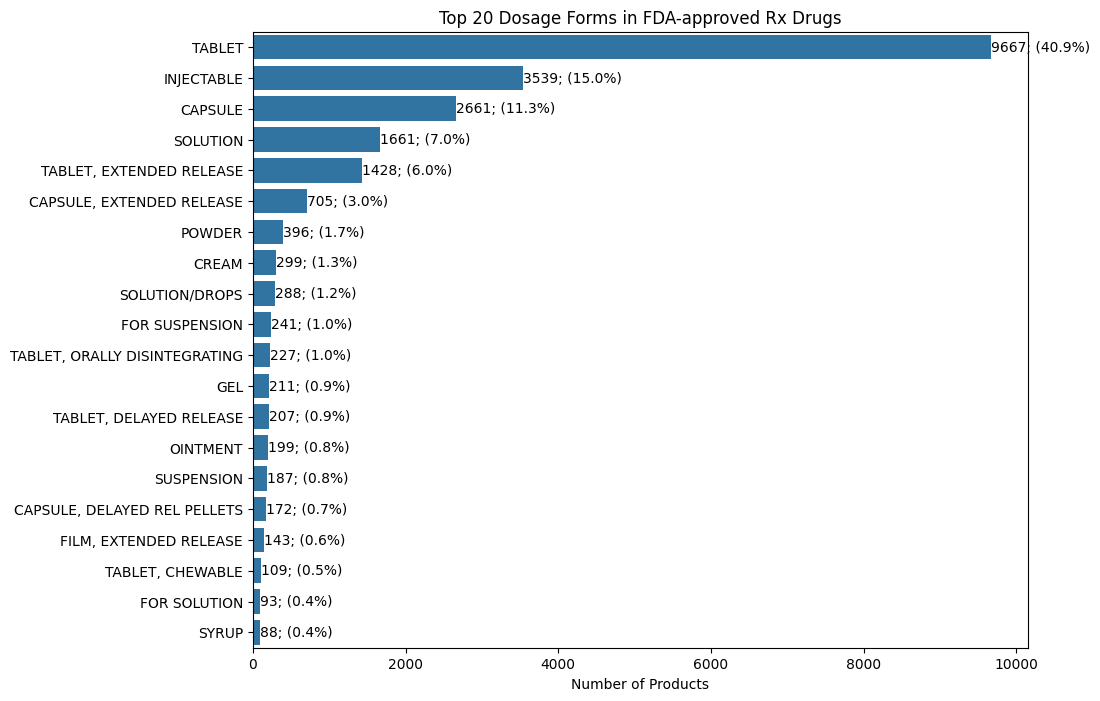

In [39]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Prescription") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved Rx drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved Rx Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Dosage_Form  count  Percentage
0                          TABLET    246        31.7
1        TABLET, EXTENDED RELEASE     81        10.4
2                        SOLUTION     50         6.4
3                         CAPSULE     45         5.8
4                  TROCHE/LOZENGE     40         5.2
5                  SOLUTION/DROPS     34         4.4
6                    GUM, CHEWING     30         3.9
7                           CREAM     28         3.6
8                  SPRAY, METERED     23         3.0
9                      SUSPENSION     22         2.8
10               TABLET, CHEWABLE     20         2.6
11                   FOR SOLUTION     15         1.9
12       CAPSULE, DELAYED RELEASE     14         1.8
13  TABLET, ORALLY DISINTEGRATING     13         1.7
14                         SPONGE     12         1.5
15        TABLET, DELAYED RELEASE     12         1.5
16                            GEL     11         1.4
17         FILM, EXTENDED RELEASE     10         1.3
18                  AEROSOL, FOAM      9         1.2
19                          SYRUP      8         1.0

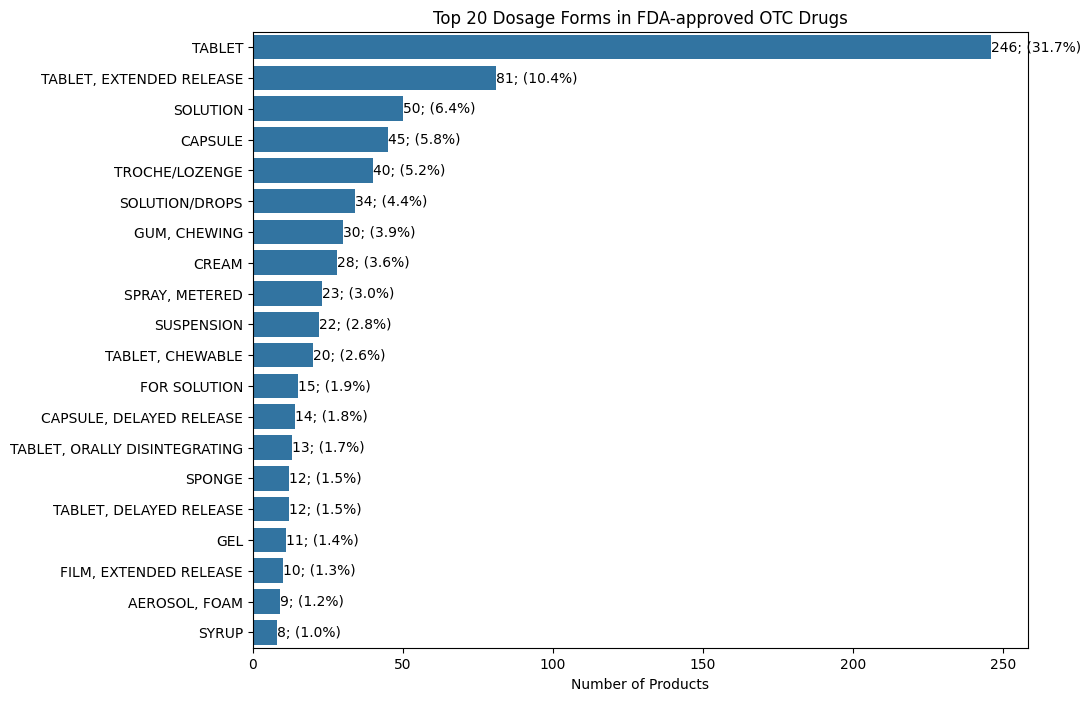

In [40]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="OTC") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved OTC drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved OTC Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Route  count  Percentage
0                         ORAL  16940        69.5
1                    INJECTION   3033        12.5
2                  INTRAVENOUS   1285         5.3
3                      TOPICAL    977         4.0
4                   OPHTHALMIC    420         1.7
5                 SUBCUTANEOUS    292         1.2
6                  TRANSDERMAL    277         1.1
7                   INHALATION    228         0.9
8                        NASAL    113         0.5
9                INTRAMUSCULAR     99         0.4
10                  SUBLINGUAL     87         0.4
11                     VAGINAL     66         0.3
12   INTRAVENOUS, SUBCUTANEOUS     65         0.3
13  INTRAMUSCULAR, INTRAVENOUS     47         0.2
14                      BUCCAL     44         0.2
15                      RECTAL     42         0.2
16                  IRRIGATION     40         0.2
17                        OTIC     35         0.1
18                 INTRATHECAL     27         0.1
19             INTRAPERITONEAL     23         0.1

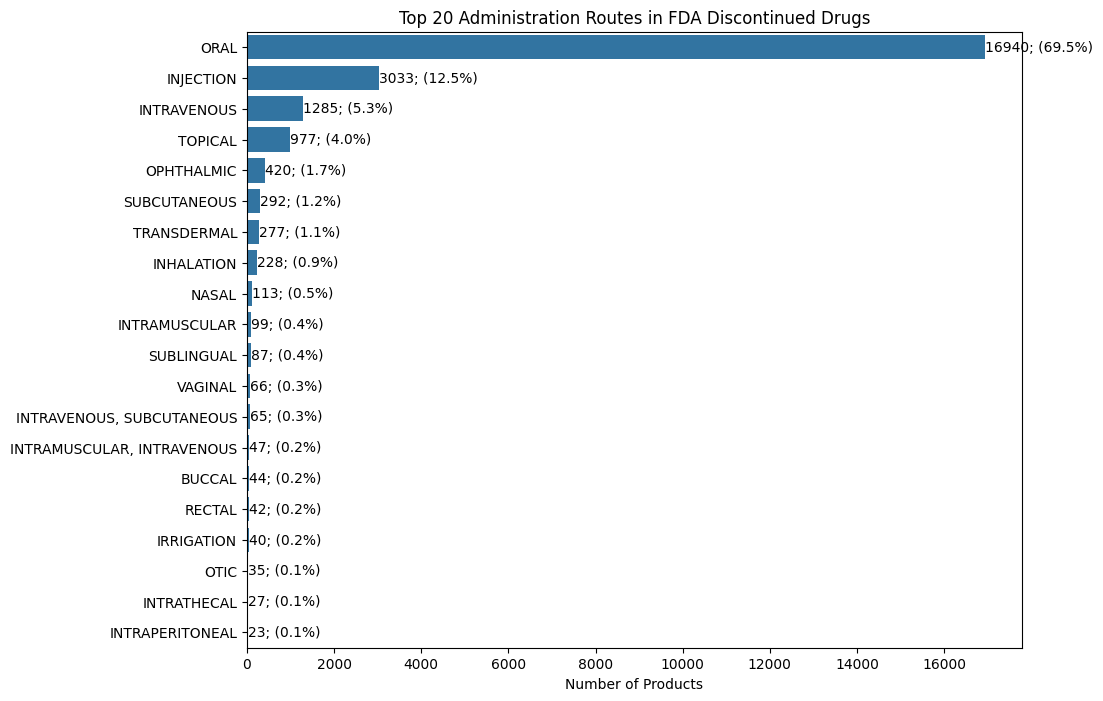

In [41]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']!="Discontinued",'Route'] #we filter the dataframe to obtain just the routes of FDA-approved drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA Discontinued Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Route  count  Percentage
0                         ORAL  16381        69.5
1                    INJECTION   3033        12.9
2                  INTRAVENOUS   1285         5.4
3                      TOPICAL    887         3.8
4                   OPHTHALMIC    385         1.6
5                 SUBCUTANEOUS    292         1.2
6                  TRANSDERMAL    267         1.1
7                   INHALATION    227         1.0
8                INTRAMUSCULAR     99         0.4
9                        NASAL     90         0.4
10                  SUBLINGUAL     87         0.4
11   INTRAVENOUS, SUBCUTANEOUS     65         0.3
12                     VAGINAL     52         0.2
13  INTRAMUSCULAR, INTRAVENOUS     47         0.2
14                  IRRIGATION     40         0.2
15                      RECTAL     37         0.2
16                        OTIC     35         0.1
17                 INTRATHECAL     27         0.1
18             INTRAPERITONEAL     23         0.1
19          BUCCAL, SUBLINGUAL     20         0.1

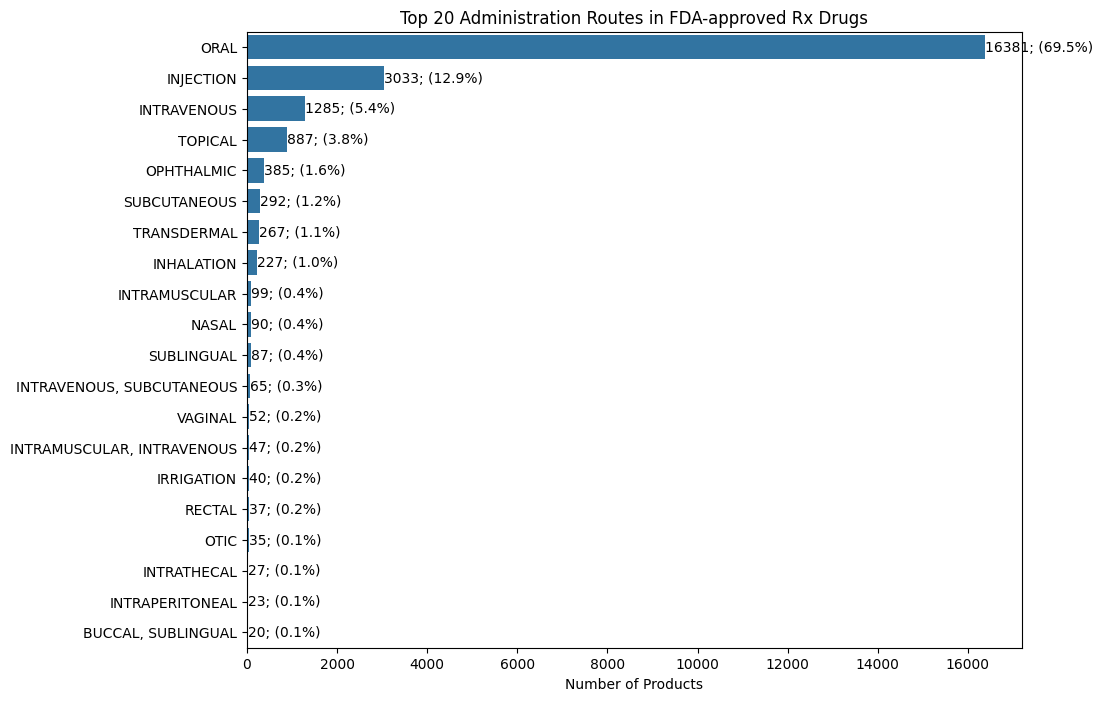

In [42]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="Prescription",'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Rx drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved Rx Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Route  count  Percentage
0              ORAL    559        72.0
1           TOPICAL     90        11.6
2        OPHTHALMIC     35         4.5
3            BUCCAL     30         3.9
4             NASAL     23         3.0
5           VAGINAL     14         1.8
6       TRANSDERMAL     10         1.3
7  TOPICAL, VAGINAL      9         1.2
8            RECTAL      5         0.6
9        INHALATION      1         0.1

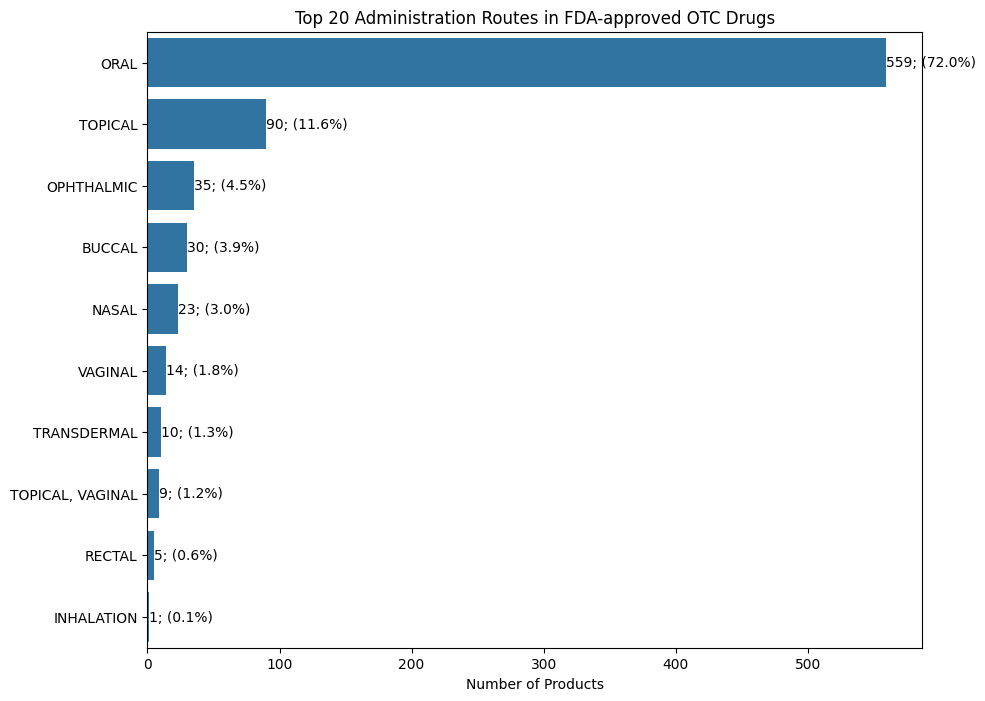

In [43]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="OTC",'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Rx drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved OTC Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Route  count
0                         ORAL   2565
1                    INJECTION    741
2                  INTRAVENOUS    499
3                      TOPICAL    220
4                 SUBCUTANEOUS    166
5                   OPHTHALMIC    128
6                   INHALATION    100
7                  TRANSDERMAL     87
8                INTRAMUSCULAR     68
9                        NASAL     44
10                  IRRIGATION     32
11                     VAGINAL     28
12             INTRAPERITONEAL     23
13                      BUCCAL     20
14                  SUBLINGUAL     16
15              INTRA-ARTERIAL     15
16   INTRAVENOUS, SUBCUTANEOUS     15
17  INTRAMUSCULAR, INTRAVENOUS     14
18                 INTRATHECAL     14
19                      RECTAL     12

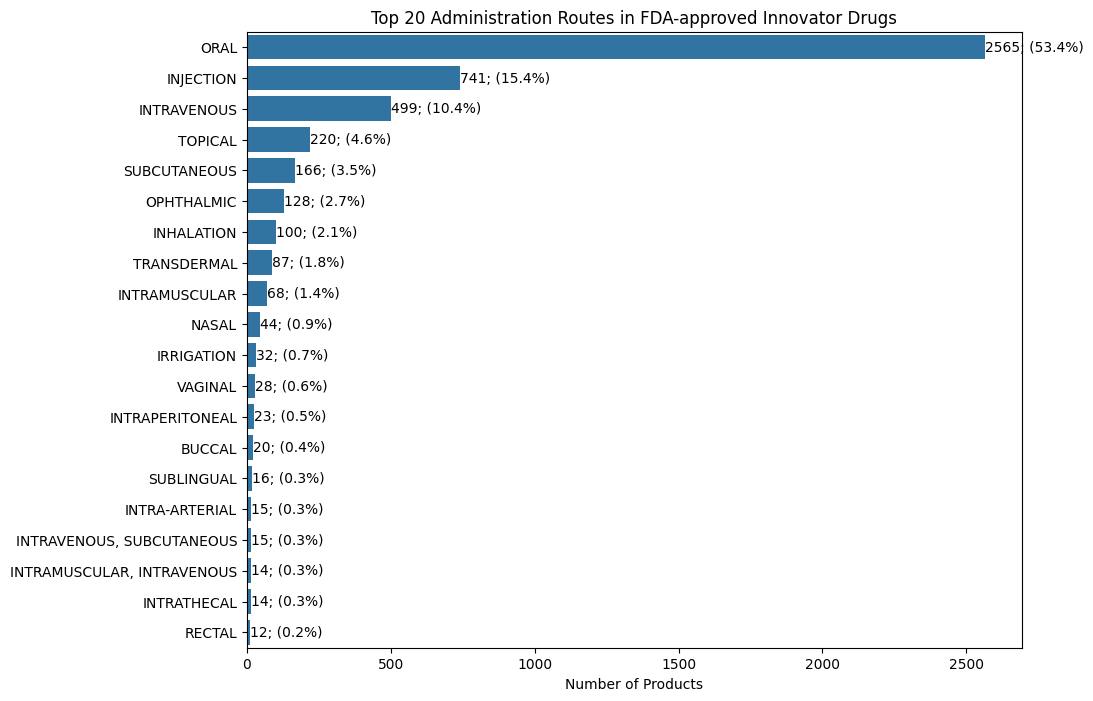

In [44]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued") & (df_prod_tr_cat['Appl_Type']=="Innovator"),'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Innovator drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().nlargest(20).reset_index()  #we create a df to calculate percentages.

display(df)

df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved Innovator Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

Route  count  Percentage
0                         ORAL  14375        73.9
1                    INJECTION   2292        11.8
2                  INTRAVENOUS    786         4.0
3                      TOPICAL    757         3.9
4                   OPHTHALMIC    292         1.5
5                  TRANSDERMAL    190         1.0
6                   INHALATION    128         0.7
7                 SUBCUTANEOUS    126         0.6
8                   SUBLINGUAL     71         0.4
9                        NASAL     69         0.4
10   INTRAVENOUS, SUBCUTANEOUS     50         0.3
11                     VAGINAL     38         0.2
12  INTRAMUSCULAR, INTRAVENOUS     33         0.2
13               INTRAMUSCULAR     31         0.2
14                      RECTAL     30         0.2
15                        OTIC     27         0.1
16                      BUCCAL     24         0.1
17                ORAL, RECTAL     19         0.1
18          BUCCAL, SUBLINGUAL     14         0.1
19                     ORAL-21     13         0.1

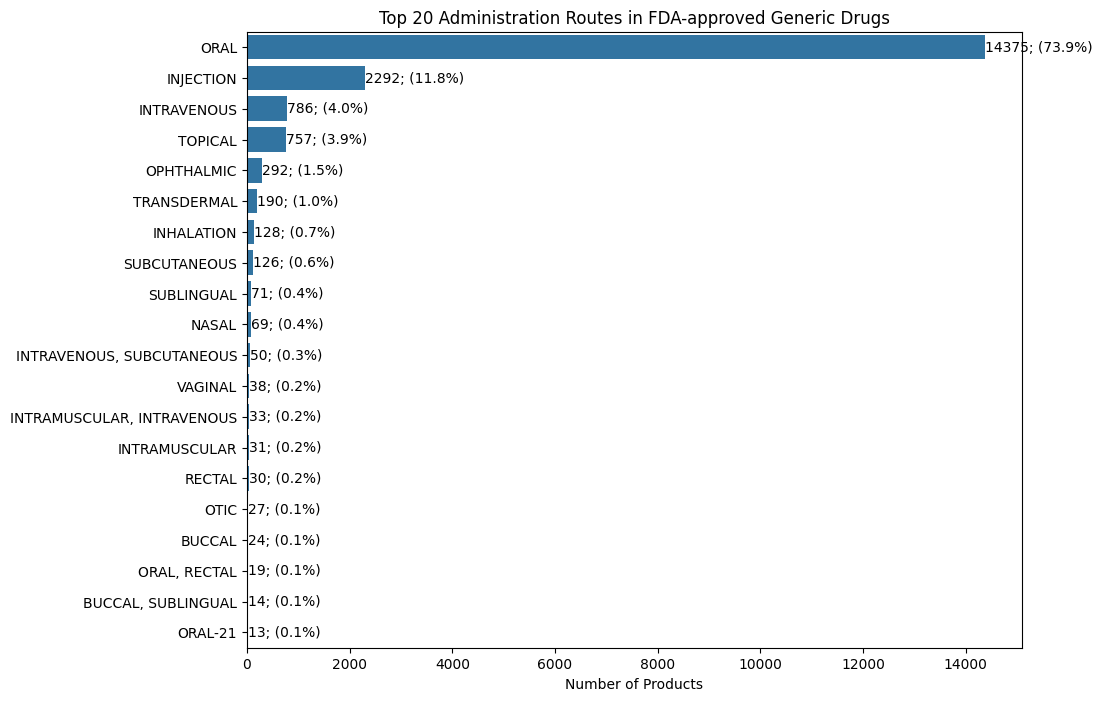

In [45]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued") & (df_prod_tr_cat['Appl_Type']=="Generic"),'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Innovator drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved Generic Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

5. Which are the firms owning the highest number of FDA-approved products (innovators/generics/Rx/OTC/)? And by Dosage Form? And by Route of administration?

Applicant_Full_Name  count  Percentage
0                     BAXTER HEALTHCARE CORP    227         4.6
1                                 PFIZER INC    141         2.9
2                                HOSPIRA INC    131         2.7
3                        B BRAUN MEDICAL INC    128         2.6
4                                 ABBVIE INC    115         2.3
5              NOVARTIS PHARMACEUTICALS CORP    115         2.3
6                     FRESENIUS KABI USA LLC    108         2.2
7             TAKEDA PHARMACEUTICALS USA INC     84         1.7
8                       BAUSCH HEALTH US LLC     80         1.6
9                                 SANDOZ INC     65         1.3
10             HIKMA PHARMACEUTICALS USA INC     63         1.3
11                    BRACCO DIAGNOSTICS INC     61         1.2
12                          ELI LILLY AND CO     58         1.2
13               JANSSEN PHARMACEUTICALS INC     56         1.1
14                           ICU MEDICAL INC     55         1.1
15      BAYER HEALTHCARE PHARMACEUTICALS INC     50         1.0
16                       ENDO OPERATIONS LTD     46         0.9
17                       GILEAD SCIENCES INC     44         0.9
18                     SANOFI AVENTIS US LLC     39         0.8
19  BOEHRINGER INGELHEIM PHARMACEUTICALS INC     39         0.8

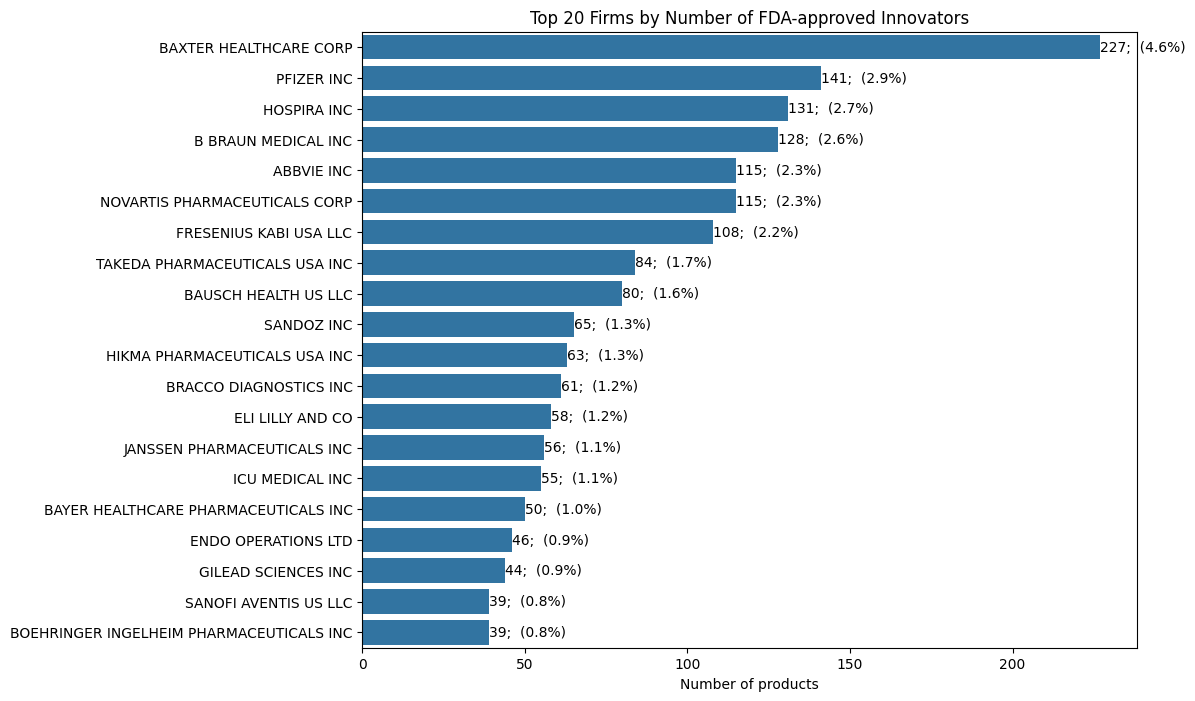

In [102]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"), 'Applicant_Full_Name']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Innovators")
plt.show()

Applicant_Full_Name  count  Percentage
0                AUROBINDO PHARMA LTD    855         4.4
1       ZYDUS PHARMACEUTICALS USA INC    556         2.9
2          DR REDDYS LABORATORIES LTD    397         2.0
3         ALEMBIC PHARMACEUTICALS LTD    390         2.0
4       HIKMA PHARMACEUTICALS USA INC    384         2.0
5                          APOTEX INC    360         1.8
6                          SANDOZ INC    354         1.8
7           MYLAN PHARMACEUTICALS INC    351         1.8
8           CHARTWELL RX SCIENCES LLC    343         1.8
9              ALKEM LABORATORIES LTD    315         1.6
10                          LUPIN LTD    306         1.6
11             FRESENIUS KABI USA LLC    296         1.5
12       MACLEODS PHARMACEUTICALS LTD    289         1.5
13  SUN PHARMACEUTICAL INDUSTRIES LTD    288         1.5
14       TEVA PHARMACEUTICALS USA INC    280         1.4
15      STRIDES PHARMA GLOBAL PTE LTD    272         1.4
16       GLENMARK PHARMACEUTICALS LTD    265         1.4
17              ACCORD HEALTHCARE INC    241         1.2
18        PRINSTON PHARMACEUTICAL INC    240         1.2
19         RISING PHARMA HOLDINGS INC    235         1.2

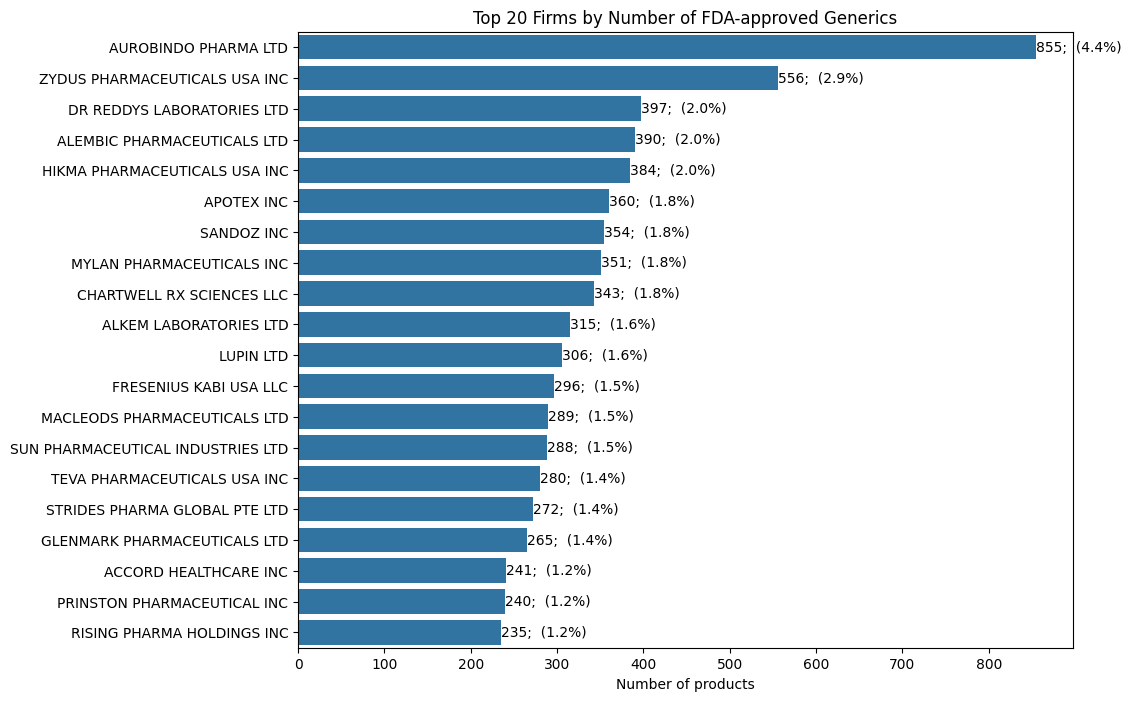

In [103]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"), 'Applicant_Full_Name']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Generics")
plt.show()

Applicant_Full_Name  count  Percentage
0                AUROBINDO PHARMA LTD    799         3.4
1       ZYDUS PHARMACEUTICALS USA INC    556         2.4
2       HIKMA PHARMACEUTICALS USA INC    446         1.9
3                          SANDOZ INC    417         1.8
4              FRESENIUS KABI USA LLC    404         1.7
5         ALEMBIC PHARMACEUTICALS LTD    388         1.6
6          DR REDDYS LABORATORIES LTD    363         1.5
7                          APOTEX INC    356         1.5
8           MYLAN PHARMACEUTICALS INC    352         1.5
9           CHARTWELL RX SCIENCES LLC    349         1.5
10             ALKEM LABORATORIES LTD    318         1.3
11                          LUPIN LTD    307         1.3
12                        HOSPIRA INC    304         1.3
13       MACLEODS PHARMACEUTICALS LTD    289         1.2
14             BAXTER HEALTHCARE CORP    288         1.2
15  SUN PHARMACEUTICAL INDUSTRIES LTD    285         1.2
16       TEVA PHARMACEUTICALS USA INC    276         1.2
17      STRIDES PHARMA GLOBAL PTE LTD    266         1.1
18       GLENMARK PHARMACEUTICALS LTD    263         1.1
19              ACCORD HEALTHCARE INC    258         1.1

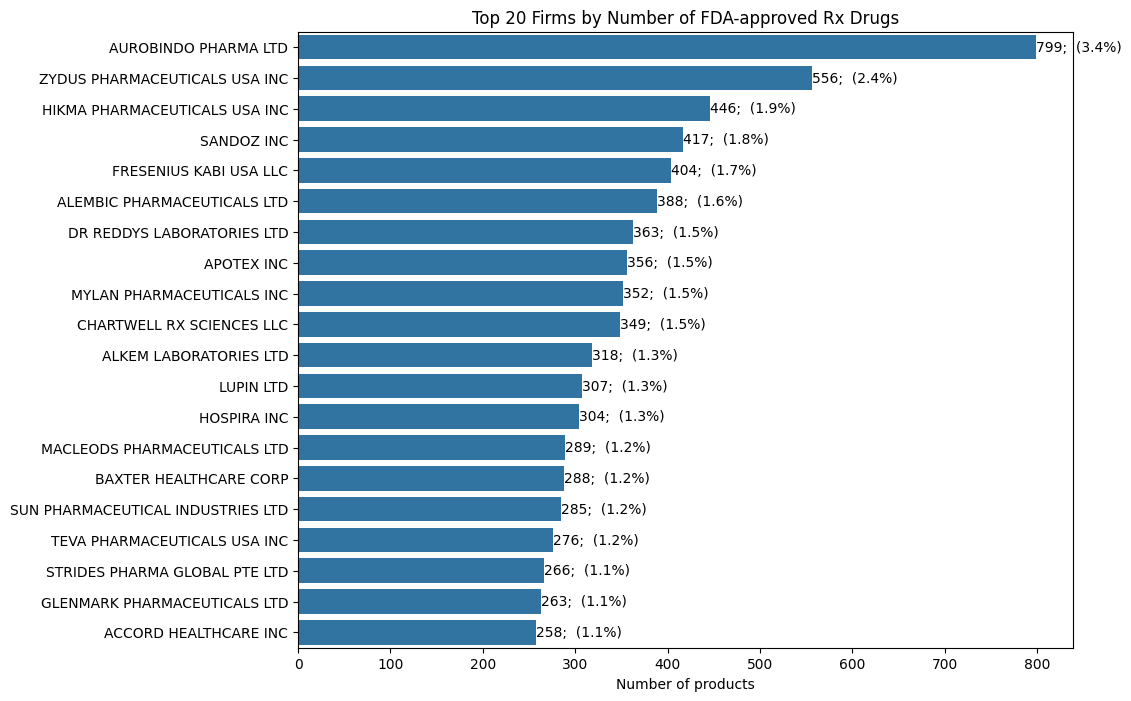

In [104]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Prescription"), 'Applicant_Full_Name']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Rx Drugs")
plt.show()

Applicant_Full_Name  count  Percentage
0                         AUROBINDO PHARMA LTD     56         7.2
1                      P AND L DEVELOPMENT LLC     43         5.5
2                           PERRIGO R AND D CO     39         5.0
3                       HALEON US HOLDINGS LLC     38         4.9
4                   DR REDDYS LABORATORIES LTD     34         4.4
5                            KENVUE BRANDS LLC     32         4.1
6                                 L PERRIGO CO     32         4.1
7           TARO PHARMACEUTICAL INDUSTRIES LTD     19         2.4
8            SUN PHARMACEUTICAL INDUSTRIES LTD     18         2.3
9                          MARKSANS PHARMA LTD     17         2.2
10                              BIONPHARMA INC     14         1.8
11                        BAYER HEALTHCARE LLC     14         1.8
12            PERRIGO PHARMA INTERNATIONAL DAC     14         1.8
13                                  APOTEX INC     13         1.7
14                     BECTON DICKINSON AND CO     12         1.5
15                          GRANULES INDIA LTD     12         1.5
16  CHATTEM INC DBA SANOFI CONSUMER HEALTHCARE     12         1.5
17                    TARO PHARMACEUTICALS INC     11         1.4
18                        MEDTECH PRODUCTS INC     10         1.3
19                   DR REDDYS LABORATORIES SA     10         1.3

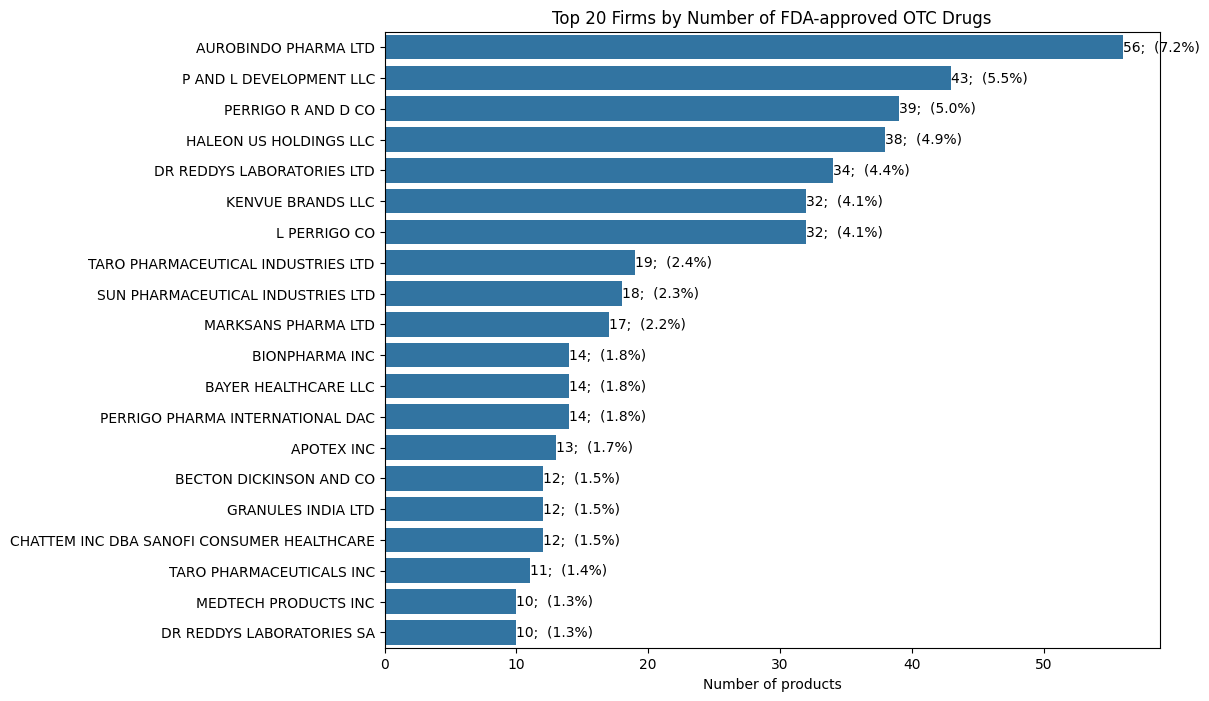

In [51]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="OTC"), 'Applicant_Full_Name']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved OTC Drugs")
plt.show()

6. What percentage represent innovators and generics with respect to the total number of FDA-approved products? And within prescription drugs? Or within OTC? Which percentage represents Rx and OTC within innovators? And within generics?

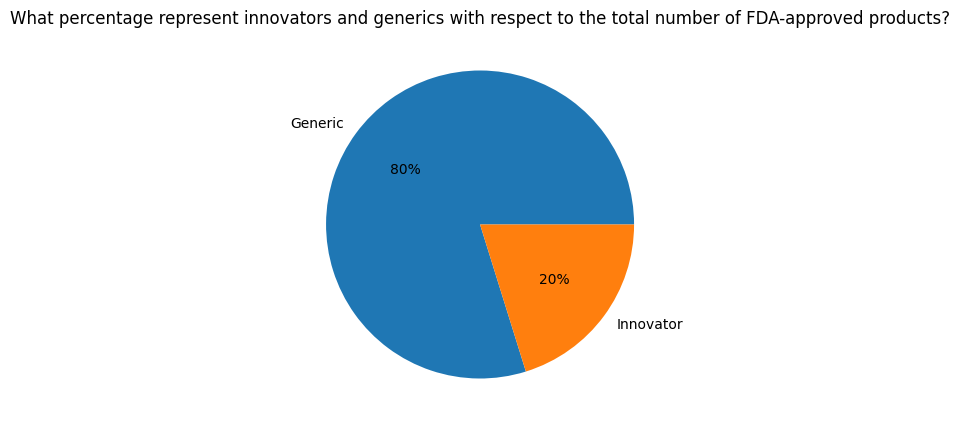

In [52]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"), 'Appl_Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent innovators and generics with respect to the total number of FDA-approved products?")
plt.show()

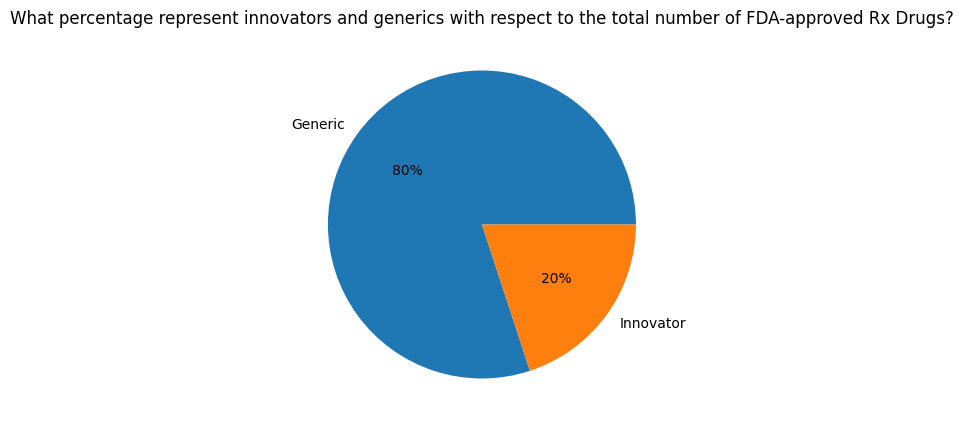

In [53]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Prescription"), 'Appl_Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent innovators and generics with respect to the total number of FDA-approved Rx Drugs?")
plt.show()

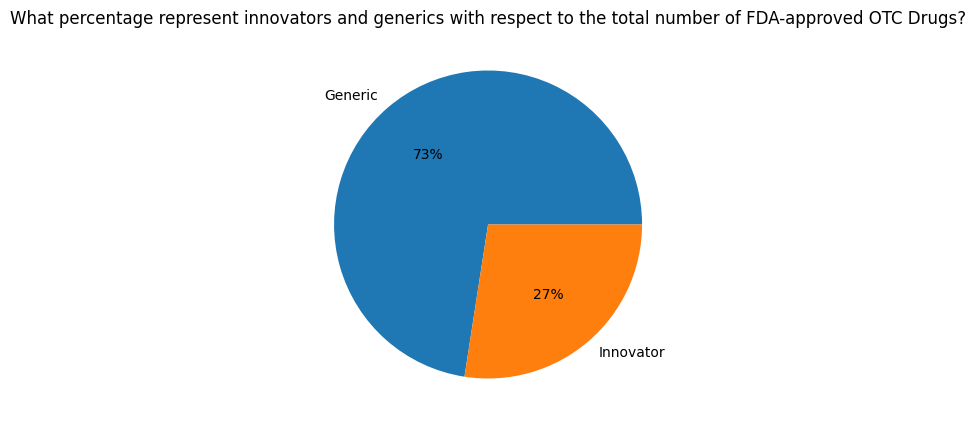

In [54]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="OTC"), 'Appl_Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent innovators and generics with respect to the total number of FDA-approved OTC Drugs?")
plt.show()

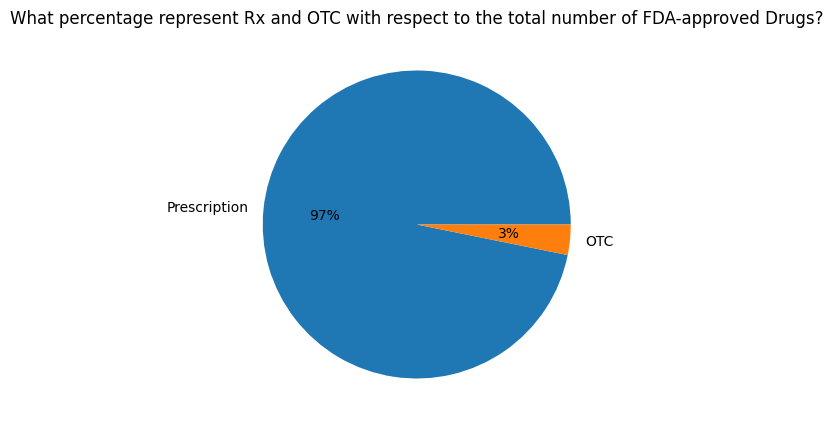

In [55]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"), 'Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent Rx and OTC with respect to the total number of FDA-approved Drugs?")
plt.show()

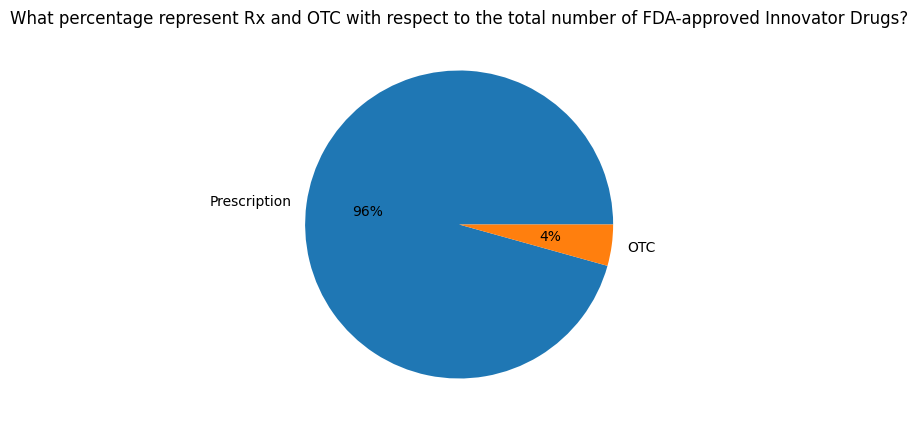

In [56]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"), 'Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent Rx and OTC with respect to the total number of FDA-approved Innovator Drugs?")
plt.show()

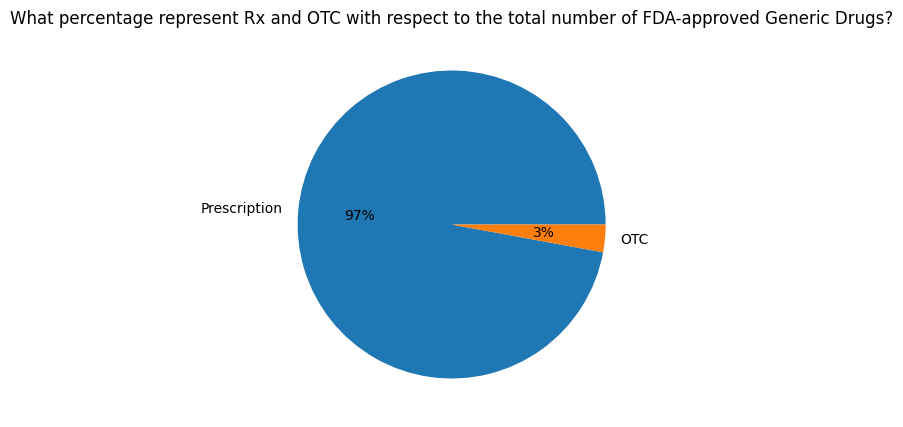

In [57]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"), 'Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent Rx and OTC with respect to the total number of FDA-approved Generic Drugs?")
plt.show()

7. How many different new drug applications (NDA or ANDAs) are registered at the FDA orange book at this moment?

In [58]:
df_prod_tr['Appl_No'].nunique() #nunique is useful for counting unique values.

26122

8. How many different products (product numbers) are normally included in a new drug application that has been approved by the FDA (mode, mean, median)? Is it different for innovators and generics? Is it different between Rx and OTC?

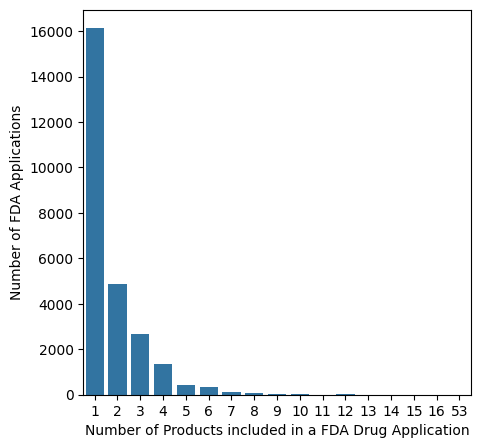

In [59]:
Products_Count_per_Appl = df_prod_tr['Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in a FDA Drug Application")
plt.ylabel("Number of FDA Applications")
plt.show()

In [60]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.8
Median = 1.0
Mode = 1


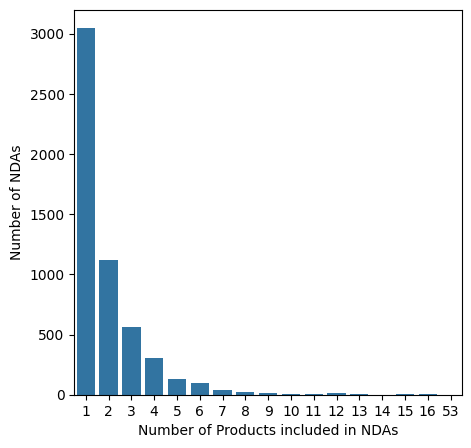

In [61]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Appl_Type']=="Innovator",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in NDAs")
plt.ylabel("Number of NDAs")
plt.show()

In [62]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 2.0
Median = 1.0
Mode = 1


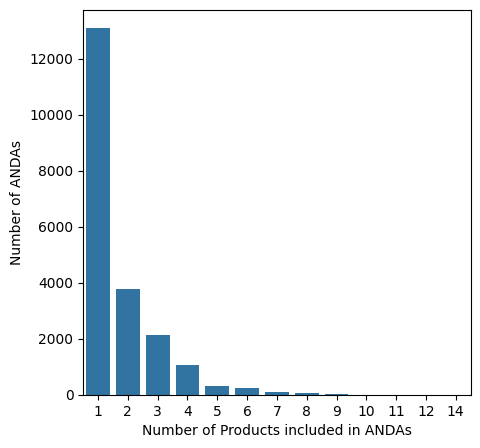

In [63]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Appl_Type']=="Generic",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in ANDAs")
plt.ylabel("Number of ANDAs")
plt.show()

In [64]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.7
Median = 1.0
Mode = 1


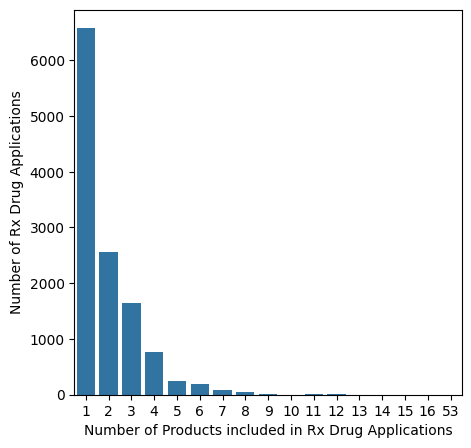

In [65]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Type']=="Prescription",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in Rx Drug Applications")
plt.ylabel("Number of Rx Drug Applications")
plt.show()

In [66]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.9
Median = 1.0
Mode = 1


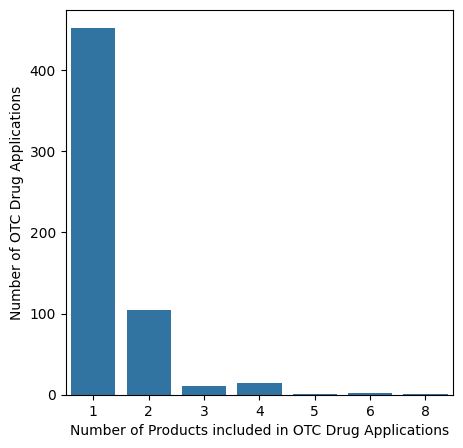

In [67]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Type']=="OTC",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in OTC Drug Applications")
plt.ylabel("Number of OTC Drug Applications")
plt.show()

In [68]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.3
Median = 1.0
Mode = 1


Ingredient Combination_Drug    Dosage_Form    Route  \
0                 BUDESONIDE               No  AEROSOL, FOAM   RECTAL   
1                 BUDESONIDE               No  AEROSOL, FOAM   RECTAL   
2  MINOCYCLINE HYDROCHLORIDE               No  AEROSOL, FOAM  TOPICAL   
4     BETAMETHASONE VALERATE               No  AEROSOL, FOAM  TOPICAL   
6     BETAMETHASONE VALERATE               No  AEROSOL, FOAM  TOPICAL   

               Trade_Name       Applicant  Appl_Type Reference_Listed_Drug  \
0              BUDESONIDE  PADAGIS ISRAEL    Generic                    No   
1                  UCERIS           SALIX  Innovator                   Yes   
2                  AMZEEQ         JOURNEY  Innovator                   Yes   
4  BETAMETHASONE VALERATE         ALEMBIC    Generic                    No   
6  BETAMETHASONE VALERATE  PADAGIS ISRAEL    Generic                    No   

  Reference_Standard Therapeutically_Equivalent          Type  \
0                Yes                        Yes  Prescription   
1                 No                        Yes  Prescription   
2                Yes                  Not Rated  Prescription   
4                 No                        Yes  Prescription   
6                 No                        Yes  Prescription   

                  Applicant_Full_Name  
0  PADAGIS ISRAEL PHARMACEUTICALS LTD  
1           SALIX PHARMACEUTICALS INC  
2                JOURNEY MEDICAL CORP  
4         ALEMBIC PHARMACEUTICALS LTD  
6  PADAGIS ISRAEL PHARMACEUTICALS LTD

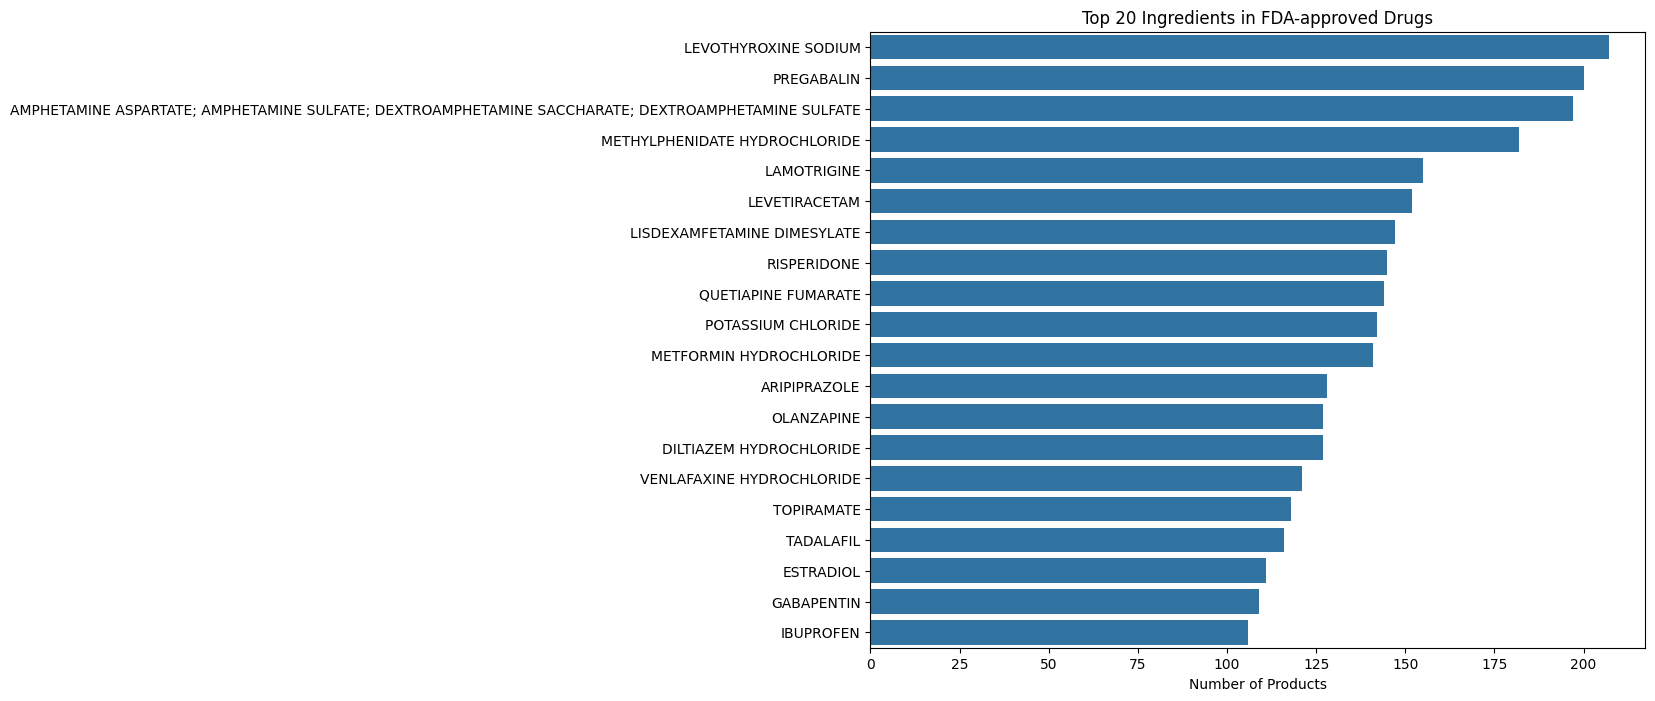

In [69]:
#Univariate analysis of Ingredient

filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued")]

display(filtered_data.head())

order = filtered_data['Ingredient'].value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=filtered_data,y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

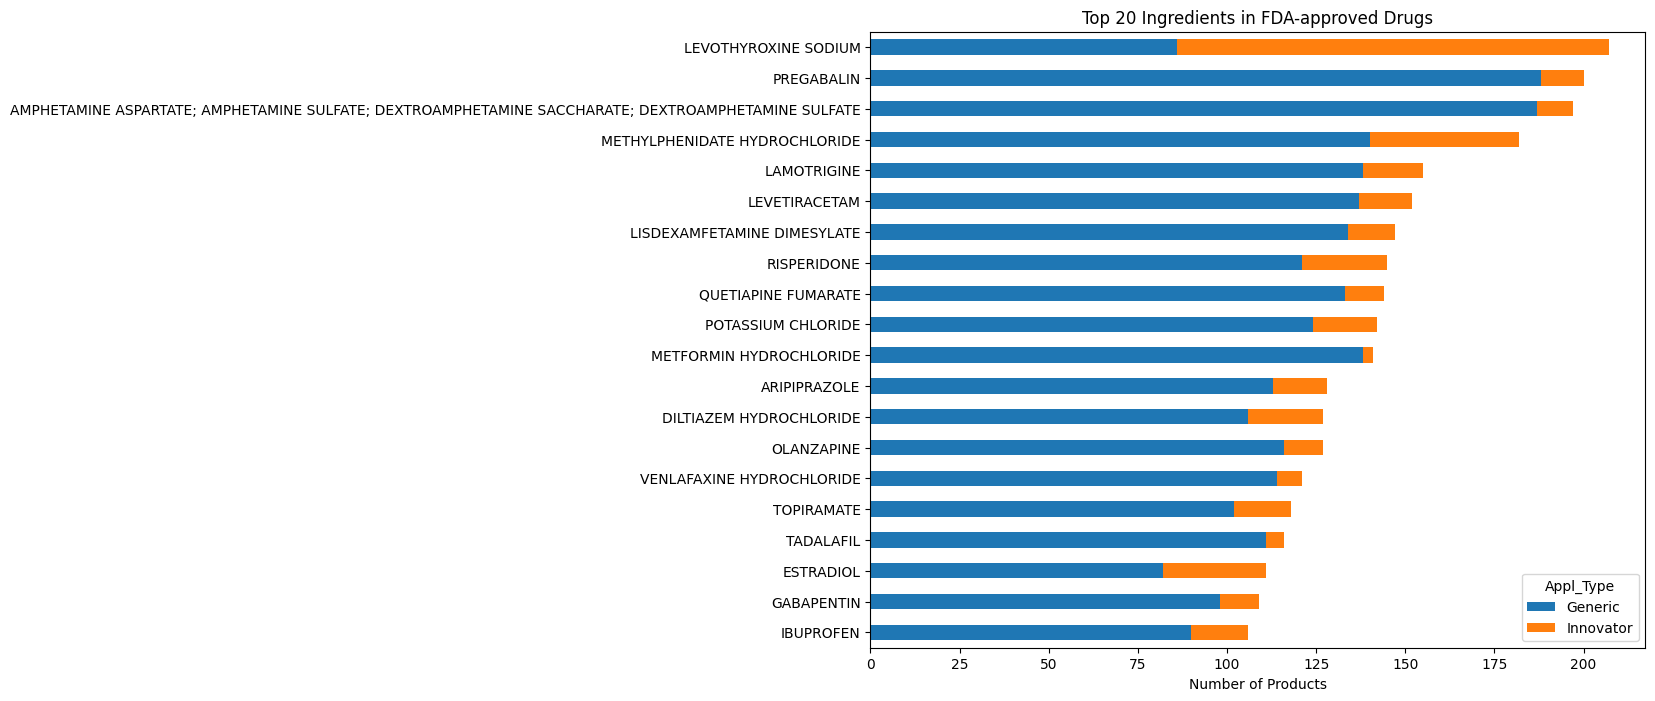

In [70]:
# Filter data
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type'] != "Discontinued"]

# Compute counts of 'Innovator' and 'Generic' per ingredient
stacked_data = pd.crosstab(filtered_data['Ingredient'], filtered_data['Appl_Type']) #it counts innovators and generics per ingredient.
# display (stacked_data.head())
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).nlargest(20).sort_values(ascending=True).index]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
stacked_data.plot(kind='barh', stacked=True, ax=ax)

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.legend(title='Appl_Type')
plt.show()

8. What percentage of FDA-approved generics are considered therapeutically equivalent to their reference listed drug (RLD)? Which percentage is not?

Index(['Yes', 'Not Rated', 'No'], dtype='object', name='Therapeutically_Equivalent')

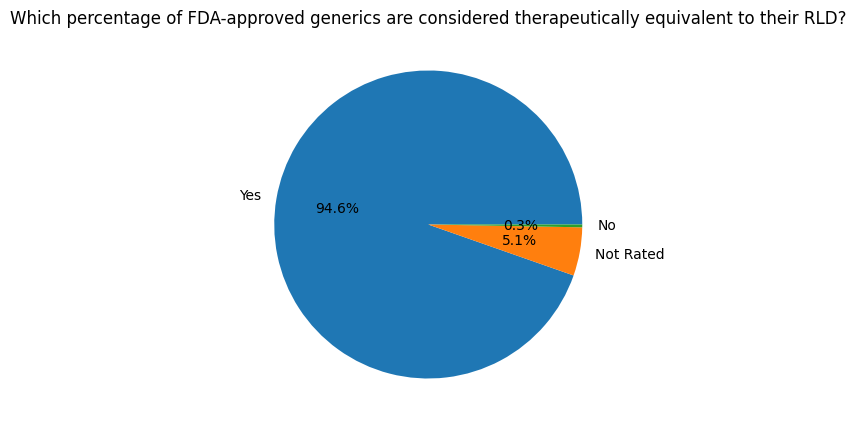

array(['EPIFOAM', 'PROCTOFOAM HC', 'TACROLIMUS', 'DIFLORASONE DIACETATE',
       'TERCONAZOLE', 'VITAMIN K1', 'METHYLPHENIDATE HYDROCHLORIDE',
       'PALIPERIDONE', 'ACETAZOLAMIDE', 'ALBUTEROL SULFATE', 'AMABELZ',
       'ANDROID 25', 'ATORVASTATIN CALCIUM', 'BACLOFEN', 'CARBAMAZEPINE',
       'DEXAMETHASONE', 'E.E.S. 400', 'ERYTHROMYCIN ETHYLSUCCINATE',
       'FEBUXOSTAT', 'FENOFIBRATE', 'METHYLTESTOSTERONE', 'PREDNISOLONE',
       'PREDNISONE', 'PROPYLTHIOURACIL', 'RISEDRONATE SODIUM',
       'SILDENAFIL CITRATE', 'TADALAFIL', 'BLISOVI FE 1.5/30'],
      dtype=object)

In [71]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"),"Therapeutically_Equivalent"].value_counts()

labels = filtered_data.index
data = filtered_data.reset_index()
display(labels)

fig, ax = plt.subplots(figsize = (5,5))
plt.pie(x=data['count'], labels=labels, autopct="%.1f%%")
plt.title("Which percentage of FDA-approved generics are considered therapeutically equivalent to their RLD?")
plt.show()

Not_Equivalent_Approved_Generics = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued") & (df_prod_tr_cat['Therapeutically_Equivalent']=="No"),['Trade_Name','Therapeutically_Equivalent']]

display(Not_Equivalent_Approved_Generics['Trade_Name'].unique())

In [72]:
df_prod_tr.head()

Ingredient  Number_Of_Ingredients Combination_Drug  \
0                 BUDESONIDE                      1               No   
1                 BUDESONIDE                      1               No   
2  MINOCYCLINE HYDROCHLORIDE                      1               No   
3               AZELAIC ACID                      1               No   
4     BETAMETHASONE VALERATE                      1               No   

     Dosage_Form    Route              Trade_Name        Applicant  Appl_Type  \
0  AEROSOL, FOAM   RECTAL              BUDESONIDE   PADAGIS ISRAEL    Generic   
1  AEROSOL, FOAM   RECTAL                  UCERIS            SALIX  Innovator   
2  AEROSOL, FOAM  TOPICAL                  AMZEEQ          JOURNEY  Innovator   
3  AEROSOL, FOAM  TOPICAL            AZELAIC ACID  TEVA PHARMS USA    Generic   
4  AEROSOL, FOAM  TOPICAL  BETAMETHASONE VALERATE          ALEMBIC    Generic   

   Appl_No  Product_No Approval_Date Reference_Listed_Drug Reference_Standard  \
0   215328           1    2023-04-12                    No                Yes   
1   205613           1    2014-10-07                   Yes                 No   
2   212379           1    2019-10-18                   Yes                Yes   
3   210928           1    2020-10-07                    No                 No   
4   215832           1    2024-08-22                    No                 No   

  Therapeutically_Equivalent          Type                 Applicant_Full_Name  
0                        Yes  Prescription  PADAGIS ISRAEL PHARMACEUTICALS LTD  
1                        Yes  Prescription           SALIX PHARMACEUTICALS INC  
2                  Not Rated  Prescription                JOURNEY MEDICAL CORP  
3                  Not Rated  Discontinued        TEVA PHARMACEUTICALS USA INC  
4                        Yes  Prescription         ALEMBIC PHARMACEUTICALS LTD

9. Which has been the FDA approval tendency over the past years?

Approval_Date  count
0    2024-01-02      1
1    2024-01-03      2
2    2024-01-04      2
3    2024-01-05      5
4    2024-01-08      5

Approval_Date  count
240    2024-12-23      4
241    2024-12-26      4
242    2024-12-27      2
243    2024-12-30      1
244    2024-12-31      6

<Axes: xlabel='Approval_Date', ylabel='count'>

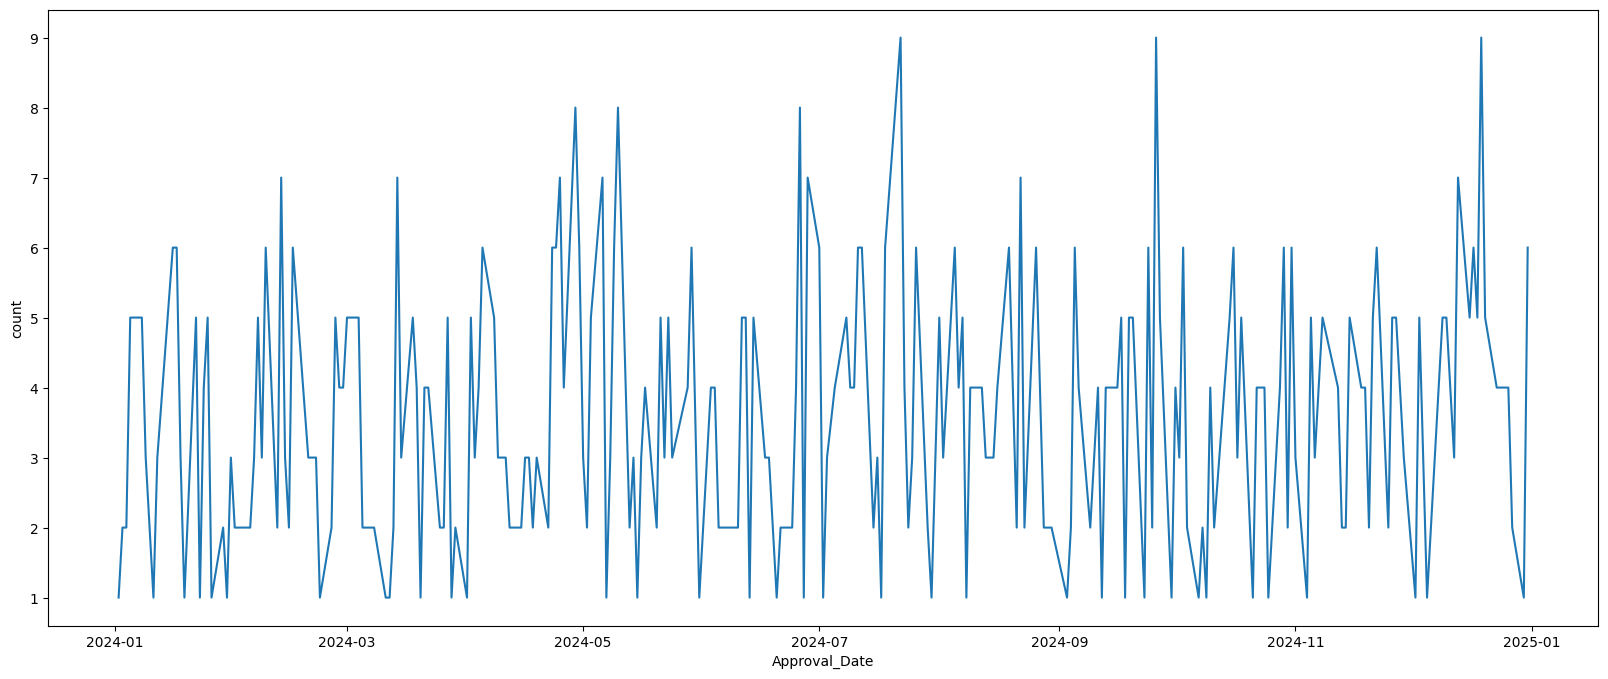

In [73]:
filtered_data = df_prod_tr.loc[(df_prod_tr['Approval_Date'] >= pd.to_datetime("2024-01-01")) & (df_prod_tr['Approval_Date'] <= pd.to_datetime("2024-12-31")),['Appl_No','Approval_Date']].drop_duplicates().groupby('Approval_Date').size().reset_index(name='count')

display(filtered_data.head())
display(filtered_data.tail())

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=filtered_data, x='Approval_Date',y='count')


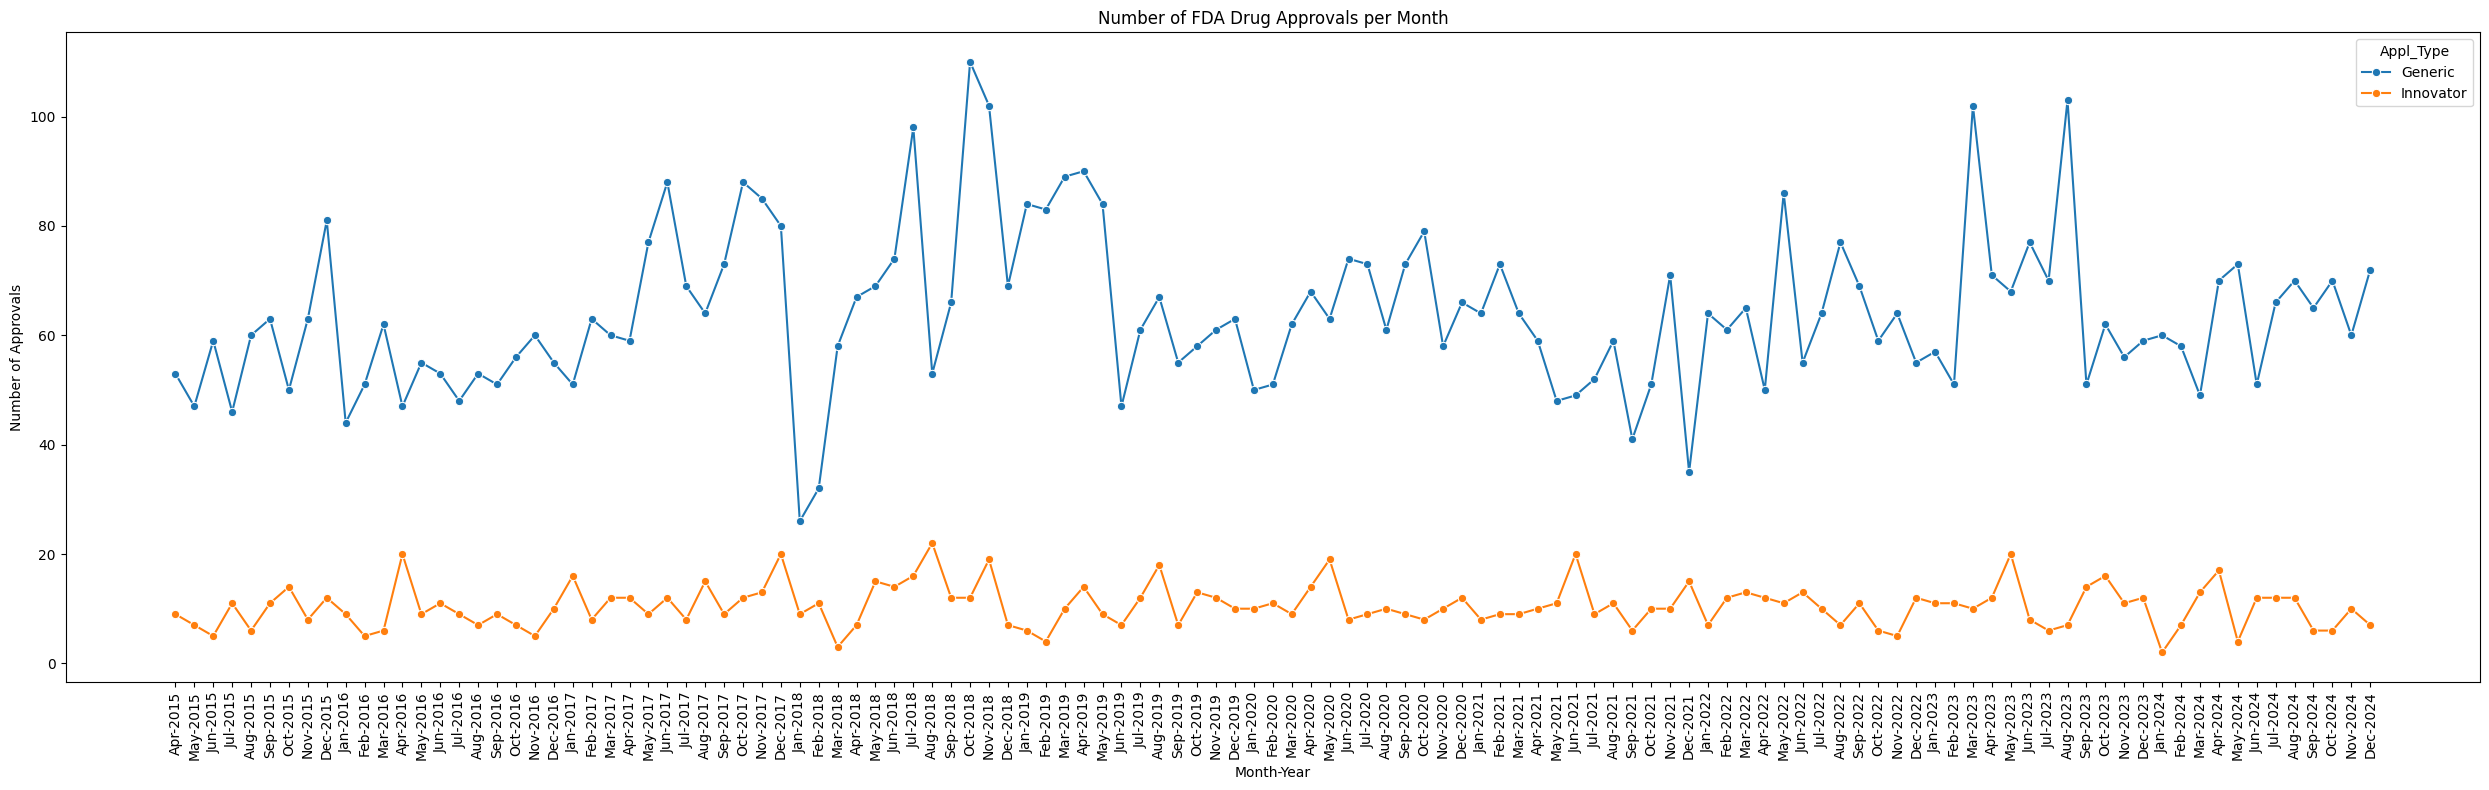

In [78]:
df_prod_tr_dates = df_prod_tr.copy() #copying the original dataframe to a new one to avoid modifying the original one.
df_prod_tr_dates['Approval_Month_Number'] = df_prod_tr_dates['Approval_Date'].dt.month #extracting month number from Approval_Date.
df_prod_tr_dates['Approval_Year'] = df_prod_tr_dates['Approval_Date'].dt.year #extracting year from Approval_Date.

df_prod_tr_dates.head()

month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'} #dictionary to map month number to month name.

df_prod_tr_dates['Approval_Month'] = df_prod_tr_dates['Approval_Month_Number'].map(month_dict) #mapping month number to month name.

df_prod_tr_dates['Approval_Month_Year'] = df_prod_tr_dates['Approval_Month'] + "-" + df_prod_tr_dates['Approval_Year'].astype(str) #creating a new column with month name and year.

df_prod_tr_dates.head()

filtered_data = df_prod_tr_dates.loc[(df_prod_tr_dates['Approval_Date'] >= pd.to_datetime("2015-04-01")) & (df_prod_tr_dates['Approval_Date'] <= pd.to_datetime("2024-12-31")),['Appl_No','Approval_Date','Approval_Month_Year','Approval_Year', 'Approval_Month_Number','Appl_Type']].drop_duplicates().groupby(['Approval_Year', 'Approval_Month_Number','Approval_Month_Year', 'Appl_Type']).size().reset_index(name='count').sort_values(by=['Approval_Year', 'Approval_Month_Number','Approval_Month_Year']) #we filter the dataframe to obtain just the data from 2018 to the last date of approval. Also we drop duplicates to avoid counting the same application number more than once. Finally we group by year, month number, month year and application type to count the number of approvals.

#filtered_data.head()

fig, ax = plt.subplots(figsize=(25,8))
sns.lineplot(data=filtered_data, x='Approval_Month_Year', y='count', marker="o", ax=ax, color="blue", hue='Appl_Type')

# Add title and labels
plt.title('Number of FDA Drug Approvals per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Approvals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

In [79]:
display(filtered_data.head())

mean_aprovals_Appl_Type = round(filtered_data.groupby('Appl_Type')['count'].mean(),0) #mean calculation for each application type over the filtered period.
print(mean_aprovals_Appl_Type)

Approval_Year  Approval_Month_Number Approval_Month_Year  Appl_Type  count
0           2015                      4            Apr-2015    Generic     53
1           2015                      4            Apr-2015  Innovator      9
2           2015                      5            May-2015    Generic     47
3           2015                      5            May-2015  Innovator      7
4           2015                      6            Jun-2015    Generic     59

Appl_Type
Generic      64.0
Innovator    10.0
Name: count, dtype: float64


10. What percentage of RLDs are considered RS by the FDA?

In [80]:
df_prod_tr_cat.head()

Ingredient Combination_Drug    Dosage_Form    Route  \
0                 BUDESONIDE               No  AEROSOL, FOAM   RECTAL   
1                 BUDESONIDE               No  AEROSOL, FOAM   RECTAL   
2  MINOCYCLINE HYDROCHLORIDE               No  AEROSOL, FOAM  TOPICAL   
3               AZELAIC ACID               No  AEROSOL, FOAM  TOPICAL   
4     BETAMETHASONE VALERATE               No  AEROSOL, FOAM  TOPICAL   

               Trade_Name        Applicant  Appl_Type Reference_Listed_Drug  \
0              BUDESONIDE   PADAGIS ISRAEL    Generic                    No   
1                  UCERIS            SALIX  Innovator                   Yes   
2                  AMZEEQ          JOURNEY  Innovator                   Yes   
3            AZELAIC ACID  TEVA PHARMS USA    Generic                    No   
4  BETAMETHASONE VALERATE          ALEMBIC    Generic                    No   

  Reference_Standard Therapeutically_Equivalent          Type  \
0                Yes                        Yes  Prescription   
1                 No                        Yes  Prescription   
2                Yes                  Not Rated  Prescription   
3                 No                  Not Rated  Discontinued   
4                 No                        Yes  Prescription   

                  Applicant_Full_Name  
0  PADAGIS ISRAEL PHARMACEUTICALS LTD  
1           SALIX PHARMACEUTICALS INC  
2                JOURNEY MEDICAL CORP  
3        TEVA PHARMACEUTICALS USA INC  
4         ALEMBIC PHARMACEUTICALS LTD

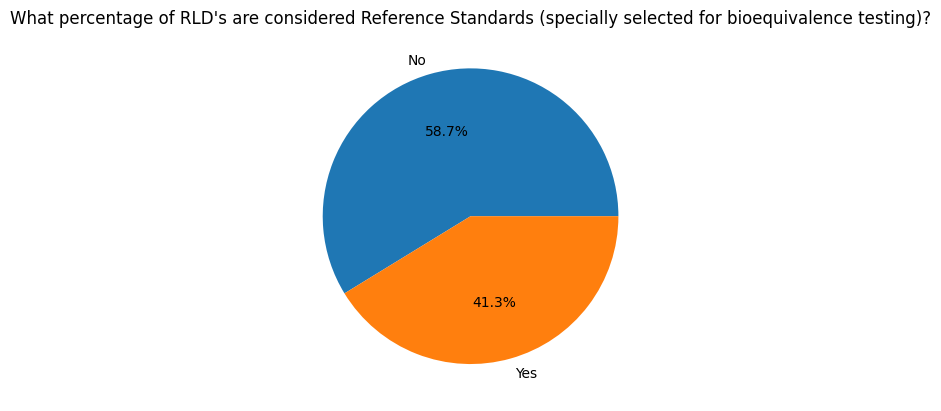

In [93]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Reference_Listed_Drug']=="Yes",['Reference_Listed_Drug','Reference_Standard']].reset_index(drop=True)

data = filtered_data['Reference_Standard'].value_counts().reset_index()
labels = filtered_data['Reference_Standard'].value_counts().index

plt.pie(x=data['count'], labels=labels, autopct="%.1f%%")
plt.title("What percentage of RLD's are considered Reference Standards (specially selected for bioequivalence testing)?")
plt.show()

11. 

Applicant_Full_Name  count  Percentage
0                             WATSON LABORATORIES INC   1056         4.9
1                              NORVIUM BIOSCIENCE LLC    498         2.3
2                                         HOSPIRA INC    486         2.2
3                           CHARTWELL RX SCIENCES LLC    452         2.1
4                        TEVA PHARMACEUTICALS USA INC    434         2.0
5                   SUN PHARMACEUTICAL INDUSTRIES LTD    342         1.6
6                   SUN PHARMACEUTICAL INDUSTRIES INC    341         1.6
7                                          SANDOZ INC    332         1.5
8                             ANI PHARMACEUTICALS INC    320         1.5
9                       HIKMA PHARMACEUTICALS USA INC    309         1.4
10                           TEVA PHARMACEUTICALS USA    268         1.2
11  IVAX PHARMACEUTICALS INC SUB TEVA PHARMACEUTIC...    241         1.1
12                                    GLAXOSMITHKLINE    232         1.1
13                          MYLAN PHARMACEUTICALS INC    214         1.0
14                      NOVARTIS PHARMACEUTICALS CORP    212         1.0
15             APOTHECON INC DIV BRISTOL MYERS SQUIBB    200         0.9
16                                ENDO OPERATIONS LTD    199         0.9
17                                         APOTEX INC    194         0.9
18                             BAXTER HEALTHCARE CORP    179         0.8
19                                   ELI LILLY AND CO    175         0.8

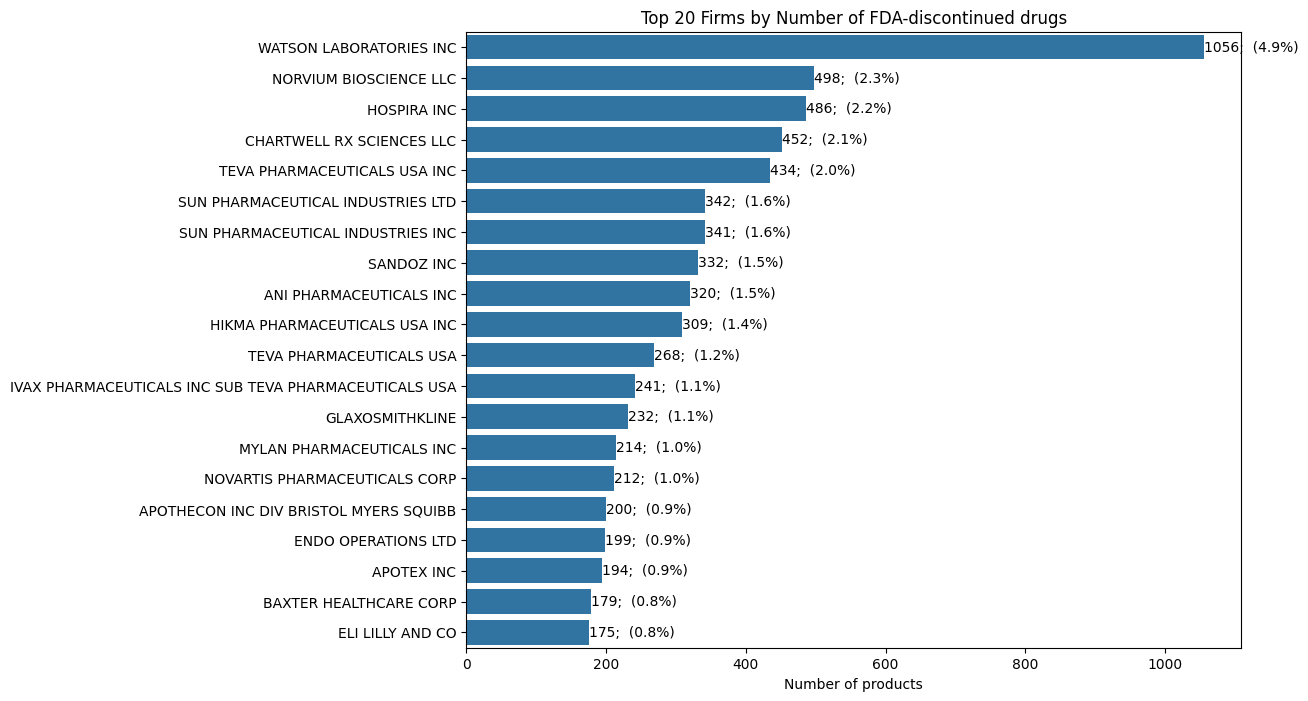

In [96]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Discontinued"), 'Applicant_Full_Name'] #we filter the dataframe to obtain just the applicants of FDA-discontinued drugs.

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-discontinued drugs")
plt.show()

In [101]:
df_prod_tr_cat.loc[df_prod_tr_cat['Applicant_Full_Name'].str.contains("SUN PHARMACEUTICAL INDUSTRIES"),'Applicant'].unique()

array(['SUN PHARM', 'SUN PHARM INDS INC', 'SUN PHARM INDUSTRIES',
       'SUN PHARM INDS LTD', 'SUN PHARM INDS (IN)', 'SUN PHARM INDS'],
      dtype=object)